In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import pearsonr
from collections import Counter

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - 203 data

### Reading the files and extracting relevant information:

In [3]:
plants = ["AV", "C", "D", "G", "M", "Y"]
xls_files = {}

for plant in plants:
    xls = pd.ExcelFile(
        f"../../../data/raw/203/EMBRAPII hubIC IACC_CIMENTO_{plant}.xlsx",
        engine="openpyxl",
    )
    xls_files[plant] = xls

<IPython.core.display.Javascript object>

In [4]:
for plant, xls in xls_files.items():
    print("Palnt: ", plant, xls.sheet_names)

Palnt:  AV ['INSTRUÇÕES', '122', '24', '134', '50']
Palnt:  C ['INSTRUÇÕES', '114', '36', '144', '74', '54']
Palnt:  D ['INSTRUÇÕES', '10', '131', '117', '197', '8']
Palnt:  G ['INSTRUÇÕES', '3', '160', '49', '137', '2', '17', '142']
Palnt:  M ['INSTRUÇÕES', '147', '141', '159', '73', '170', '53', '135', '67', '161']
Palnt:  Y ['INSTRUÇÕES', '77', '151', '179', '136', '71', '113']


<IPython.core.display.Javascript object>

In [5]:
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names[1:]:
        df = pd.read_excel(xls_files[plant], sheet_name, header=[0, 1, 2])
        dataframes.append(df.drop([0, 1], axis=0).reset_index(drop=True).copy())

<IPython.core.display.Javascript object>

In [6]:
df = pd.concat(dataframes, axis=0).reset_index(drop=True)

<IPython.core.display.Javascript object>

In [7]:
df["Dados iniciais"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   (Cidade, Unnamed: 1_level_2)                 19923 non-null  object 
 1   (Data, Produção)                             19511 non-null  object 
 2   (Horário, Produção)                          0 non-null      float64
 3   (Data, Medida)                               19511 non-null  object 
 4   (Horário, Medida)                            0 non-null      float64
 5   (Tipo de cimento, Unnamed: 6_level_2)        18674 non-null  object 
 6   (Classe de resistência, Unnamed: 7_level_2)  18674 non-null  object 
 7   (Obs., Unnamed: 8_level_2)                   3650 non-null   object 
dtypes: float64(2), object(6)
memory usage: 1.2+ MB


<IPython.core.display.Javascript object>

In [8]:
df["Materiais cimentícios suplementares"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 59 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   (Fíler calcário, CaO)              0 non-null      float64
 1   (Fíler calcário, SO2)              0 non-null      float64
 2   (Fíler calcário, K2O)              0 non-null      float64
 3   (Fíler calcário, MgO)              0 non-null      float64
 4   (Fíler calcário, Na2O)             0 non-null      float64
 5   (Fíler calcário, SiO2)             0 non-null      float64
 6   (Fíler calcário, Al2O3)            0 non-null      float64
 7   (Fíler calcário, Fe2O3)            0 non-null      float64
 8   (Fíler calcário, Perda ao fogo)    0 non-null      float64
 9   (Fíler calcário, Calcita)          0 non-null      float64
 10  (Fíler calcário, Dolomita)         0 non-null      float64
 11  (Fíler calcário, Quartzo)          0 non-null      flo

<IPython.core.display.Javascript object>

In [9]:
df["Cimento"]["Composição"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Clínquer           0 non-null      float64
 1   Fíler calcário     0 non-null      float64
 2   Cinza volante      0 non-null      float64
 3   Escória            0 non-null      float64
 4   Argila calcinada   0 non-null      float64
 5   Sulfato de cálcio  0 non-null      float64
 6   Obs.               0 non-null      float64
dtypes: float64(7)
memory usage: 1.1 MB


<IPython.core.display.Javascript object>

In [10]:
df["Cimento"]["Análise química"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CaO                7857 non-null   float64
 1   MgO                18883 non-null  object 
 2   Na2O               18823 non-null  object 
 3   Al2O3              7859 non-null   float64
 4   SiO2               7859 non-null   float64
 5   SO3                18876 non-null  object 
 6   K2O                18205 non-null  object 
 7   TiO2               2843 non-null   float64
 8   Fe2O3              7810 non-null   float64
 9   Perda ao fogo      18831 non-null  object 
 10  Resíduo insolúvel  11760 non-null  object 
 11  Obs.               0 non-null      float64
dtypes: float64(6), object(6)
memory usage: 1.8+ MB


<IPython.core.display.Javascript object>

In [11]:
df["Cimento"]["Análise mineralógica"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   C3S total          0 non-null      float64
 1   C2S total          0 non-null      float64
 2   C2S alpha          0 non-null      float64
 3   C2S beta           0 non-null      float64
 4   C2S gama           0 non-null      float64
 5   C4AF               0 non-null      float64
 6   C3A                0 non-null      float64
 7   C3A cubic          0 non-null      float64
 8   C3A orto           0 non-null      float64
 9   CaO livre          0 non-null      float64
 10  Portlandita        0 non-null      float64
 11  Periclasio         0 non-null      float64
 12  Arcanita           0 non-null      float64
 13  Aphthalita         0 non-null      float64
 14  Langbeinita        0 non-null      float64
 15  Sulfato de cálcio  0 non-null      float64
 16  Bassanita          0 n

<IPython.core.display.Javascript object>

In [12]:
df["Cimento"].columns

MultiIndex([(          'Composição',          'Clínquer'),
            (          'Composição',    'Fíler calcário'),
            (          'Composição',     'Cinza volante'),
            (          'Composição',           'Escória'),
            (          'Composição',  'Argila calcinada'),
            (          'Composição', 'Sulfato de cálcio'),
            (          'Composição',              'Obs.'),
            (     'Análise química',               'CaO'),
            (     'Análise química',               'MgO'),
            (     'Análise química',              'Na2O'),
            (     'Análise química',             'Al2O3'),
            (     'Análise química',              'SiO2'),
            (     'Análise química',               'SO3'),
            (     'Análise química',               'K2O'),
            (     'Análise química',              'TiO2'),
            (     'Análise química',             'Fe2O3'),
            (     'Análise química',     'Perda ao fogo'

<IPython.core.display.Javascript object>

In [13]:
df["Característias físicas do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   (Unnamed: 136_level_1, Blaine)            19331 non-null  object 
 1   (Unnamed: 137_level_1, #200)              17904 non-null  object 
 2   (Unnamed: 138_level_1, #325)              19170 non-null  object 
 3   (Unnamed: 139_level_1, #400)              0 non-null      float64
 4   (Unnamed: 140_level_1, Massa específica)  6921 non-null   object 
 5   (Unnamed: 141_level_1, Obs.)              0 non-null      float64
dtypes: float64(2), object(4)
memory usage: 947.1+ KB


<IPython.core.display.Javascript object>

In [14]:
df["Propriedades do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   (Tempo de pega, Inicio)           18883 non-null  object 
 1   (Tempo de pega, Fim)              18467 non-null  object 
 2   (Resistência à compressão, 1 d)   18909 non-null  object 
 3   (Resistência à compressão, 3 d)   14713 non-null  float64
 4   (Resistência à compressão, 7 d)   18847 non-null  object 
 5   (Resistência à compressão, 28 d)  18614 non-null  object 
 6   (Obs., Unnamed: 148_level_2)      0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 1.1+ MB


<IPython.core.display.Javascript object>

In [15]:
def convert_to_float(value):
    try:
        # If it's a string enclosed in single quotes, remove quotes and replace comma with dot
        if isinstance(value, str):
            return float(value.replace(",", "."))
        else:
            return float(value)
    except ValueError as e:
        print(e)
        return float("nan")

<IPython.core.display.Javascript object>

In [16]:
df = pd.concat(
    [
        df["Dados iniciais"],
        df["Cimento"]["Análise química"],
        df["Característias físicas do cimento"],
        df["Propriedades do cimento"],
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [17]:
COLUMNS_TO_DROP = [
    ("Data", "Produção"),
    ("Horário", "Produção"),
    ("Horário", "Medida"),
    ("Obs.", "Unnamed: 148_level_2"),
    ("Tipo de cimento", "Unnamed: 6_level_2"),
    ("Classe de resistência", "Unnamed: 7_level_2"),
    ("Obs.", "Unnamed: 8_level_2"),
    "Obs.",
    ("Obs.", "Unnamed: 148_level_2"),
    ("Unnamed: 141_level_1", "Obs."),
    ("Unnamed: 139_level_1", "#400"),
]

COLUMNS_TO_RENAME = {
    ("Cidade", "Unnamed: 1_level_2"): "Plant",
    ("Data", "Medida"): "Date",
    ("Unnamed: 136_level_1", "Blaine"): "Blaine",
    ("Unnamed: 137_level_1", "#200"): "#200",
    ("Unnamed: 138_level_1", "#325"): "#325",
    ("Unnamed: 139_level_1", "#400"): "#400",
    ("Unnamed: 140_level_1", "Massa específica"): "Specific Gravity",
    ("Tempo de pega", "Fim"): "Final setting time",
    ("Tempo de pega", "Inicio"): "Initial setting time",
    ("Resistência à compressão", "1 d"): "CS1",
    ("Resistência à compressão", "3 d"): "CS3",
    ("Resistência à compressão", "7 d"): "CS7",
    ("Resistência à compressão", "28 d"): "CS28",
    "Perda ao fogo": "Loss on Ignition",
    "Resíduo insolúvel": "Insoluble Residue",
}

# Single variable for the Cement Type
df["Cement_Type"] = (
    df[
        [
            ("Tipo de cimento", "Unnamed: 6_level_2"),
            ("Classe de resistência", "Unnamed: 7_level_2"),
            ("Obs.", "Unnamed: 8_level_2"),
        ]
    ]
    .fillna("")
    .astype(str)
    .sum(axis=1)
)

# Preprocessing
df["Cement_Type"] = df["Cement_Type"].replace("FIBROCMENTO", "Fibrocimento")
df["Cement_Type"] = df["Cement_Type"].replace("CP VARIEnsacado", "CP VARI")
df["Cement_Type"] = df["Cement_Type"].replace("CP VARIGranel", "CP VARI")
df["Cement_Type"] = df["Cement_Type"].replace("CP III40Ensacado", "CP III40")
df["Cement_Type"] = df["Cement_Type"].replace("CP III40Granel", "CP III40")
df["Cement_Type"] = df["Cement_Type"].replace("CP VARIRS", "CP VARI")

df = df.drop(COLUMNS_TO_DROP, axis=1).rename(COLUMNS_TO_RENAME, axis=1).copy()
df = df.infer_objects()

<IPython.core.display.Javascript object>

In [18]:
NUMERIC_COLUMNS = [
    "CaO",
    "MgO",
    "Na2O",
    "Al2O3",
    "SiO2",
    "SO3",
    "K2O",
    "TiO2",
    "Fe2O3",
    "Loss on Ignition",
    "Insoluble Residue",
    "Blaine",
    "#200",
    "#325",
    "Specific Gravity",
    "Final setting time",
    "Initial setting time",
    "CS1",
    "CS3",
    "CS7",
    "CS28",
]

# Preprocessing to fix numeric columns
df[NUMERIC_COLUMNS] = df[NUMERIC_COLUMNS].map(convert_to_float)

# Converting Date to pandas datetime
df["Date"] = pd.to_datetime(df["Date"])

# Drop rows completely missing
index_to_keep = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).dropna(axis=0, how="all").index
)
df = df.iloc[index_to_keep].reset_index(drop=True)

could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '1..10'
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: '             '
could not convert string to float: '  '
could not convert string to float: ' '
could not convert string to float: '1.6.0'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
coul

<IPython.core.display.Javascript object>

In [19]:
df = df[df["Plant"] == "D"].reset_index(drop=True)

<IPython.core.display.Javascript object>

# EDA

In [20]:
df.shape

(4908, 24)

<IPython.core.display.Javascript object>

In [21]:
df.head()

Plant       Date  CaO   MgO   Na2O  Al2O3  SiO2   SO3   K2O  TiO2  ...  \
0     D 2015-08-12  NaN  1.15  0.020    NaN   NaN  2.79  1.00   NaN  ...   
1     D 2015-08-13  NaN  1.13  0.019    NaN   NaN  2.73  0.99   NaN  ...   
2     D 2015-08-14  NaN  1.14  0.020    NaN   NaN  2.95  0.95   NaN  ...   
3     D 2015-08-15  NaN  1.14  0.020    NaN   NaN  2.94  0.98   NaN  ...   
4     D 2015-08-16  NaN  1.14  0.022    NaN   NaN  2.94  0.98   NaN  ...   

   #200  #325  Specific Gravity  Initial setting time  Final setting time  \
0  0.97  7.86              3.12                 177.0               220.0   
1  0.94  7.42              3.12                 171.0               218.0   
2  0.68  6.29              3.12                 188.0               271.0   
3  0.99  8.42              3.12                 176.0               249.0   
4  0.93  7.89              3.12                 162.0               225.0   

    CS1   CS3   CS7  CS28  Cement_Type  
0  19.7  32.8  39.1  49.9    CP II-F32  
1  19.9  32.4  40.8  49.8    CP II-F32  
2  21.3  32.4  41.3  50.4    CP II-F32  
3  21.6  34.6  42.2  50.6    CP II-F32  
4  21.7  33.7  41.0  51.3    CP II-F32  

[5 rows x 24 columns]

<IPython.core.display.Javascript object>

In [22]:
df.tail()

Plant       Date  CaO   MgO   Na2O  Al2O3  SiO2   SO3   K2O  TiO2  ...  \
4903     D 2023-04-18  NaN  2.43  0.070    NaN   NaN  4.37  1.20   NaN  ...   
4904     D 2023-04-19  NaN  2.43  0.070    NaN   NaN  4.31  1.20   NaN  ...   
4905     D 2023-04-20  NaN  2.39  0.060    NaN   NaN  4.15  1.20   NaN  ...   
4906     D 2023-04-24  NaN  2.51  0.062    NaN   NaN  4.20  1.22   NaN  ...   
4907     D 2023-04-25  NaN  2.68  0.053    NaN   NaN  4.24  1.22   NaN  ...   

      #200  #325  Specific Gravity  Initial setting time  Final setting time  \
4903  0.04  0.48              3.08                 161.0               221.0   
4904  0.04  0.46              3.08                 165.0               225.0   
4905  0.04  0.43              3.08                 171.0               231.0   
4906  0.04  0.44              3.08                 177.0               237.0   
4907  0.03  0.35              3.08                 181.0               241.0   

       CS1   CS3   CS7  CS28  Cement_Type  
4903  29.5  40.1  44.2   NaN      CP VARI  
4904  28.0   NaN   NaN   NaN      CP VARI  
4905  29.0   NaN   NaN   NaN      CP VARI  
4906  28.6   NaN   NaN   NaN      CP VARI  
4907   NaN   NaN   NaN   NaN      CP VARI  

[5 rows x 24 columns]

<IPython.core.display.Javascript object>

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Plant                 4908 non-null   object        
 1   Date                  4908 non-null   datetime64[ns]
 2   CaO                   0 non-null      float64       
 3   MgO                   4880 non-null   float64       
 4   Na2O                  4880 non-null   float64       
 5   Al2O3                 0 non-null      float64       
 6   SiO2                  0 non-null      float64       
 7   SO3                   4873 non-null   float64       
 8   K2O                   4880 non-null   float64       
 9   TiO2                  0 non-null      float64       
 10  Fe2O3                 0 non-null      float64       
 11  Loss on Ignition      4880 non-null   float64       
 12  Insoluble Residue     1298 non-null   float64       
 13  Blaine            

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

In [24]:
df.dtypes.value_counts()

float64           21
object             2
datetime64[ns]     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [25]:
df.describe().transpose()

count                           mean  \
Date                    4908  2019-06-17 07:56:33.154034176   
CaO                      0.0                            NaN   
MgO                   4880.0                       2.119904   
Na2O                  4880.0                       0.103564   
Al2O3                    0.0                            NaN   
SiO2                     0.0                            NaN   
SO3                   4873.0                       3.076839   
K2O                   4880.0                       1.077507   
TiO2                     0.0                            NaN   
Fe2O3                    0.0                            NaN   
Loss on Ignition      4880.0                       5.267811   
Insoluble Residue     1298.0                       4.734829   
Blaine                4882.0                     4292.45637   
#200                  4875.0                       0.622955   
#325                  4880.0                       4.788248   
Specific Gravity      4793.0                       3.118699   
Initial setting time  4908.0                     170.848879   
Final setting time    4908.0                     231.800733   
CS1                   4904.0                      21.045752   
CS3                   2513.0                      33.184481   
CS7                   4883.0                      39.250647   
CS28                  4830.0                      46.744803   

                                      min                  25%  \
Date                  2011-01-19 00:00:00  2017-08-08 00:00:00   
CaO                                   NaN                  NaN   
MgO                                 1.038                 1.69   
Na2O                               0.0001                0.039   
Al2O3                                 NaN                  NaN   
SiO2                                  NaN                  NaN   
SO3                                  1.09                 2.69   
K2O                                 0.016                 1.03   
TiO2                                  NaN                  NaN   
Fe2O3                                 NaN                  NaN   
Loss on Ignition                     0.49                 2.88   
Insoluble Residue                    0.24                 1.07   
Blaine                             1358.0               4045.0   
#200                                  0.0                 0.04   
#325                                 0.03                 0.75   
Specific Gravity                     2.83                  3.0   
Initial setting time                  0.0                155.0   
Final setting time                   21.0                215.0   
CS1                                   7.4                 13.9   
CS3                                  17.3                 25.0   
CS7                                  21.0                 31.5   
CS28                                 29.8                 39.2   

                                      50%                  75%  \
Date                  2019-06-26 00:00:00  2021-05-04 00:00:00   
CaO                                   NaN                  NaN   
MgO                                  2.12                 2.51   
Na2O                                 0.05                0.076   
Al2O3                                 NaN                  NaN   
SiO2                                  NaN                  NaN   
SO3                                  2.83                 3.33   
K2O                                  1.08                 1.15   
TiO2                                  NaN                  NaN   
Fe2O3                                 NaN                  NaN   
Loss on Ignition                     4.67                 6.44   
Insoluble Residue                   2.005               4.4275   
Blaine                             4302.0               4495.0   
#200                                 0.16                 1.15   
#325                                1.935                 10.0  

<IPython.core.display.Javascript object>

<h3>1.2 Structure of Non-Numeric features</h3>

In [26]:
df.describe(exclude="number").T

count unique      top  freq                           mean  \
Plant        4908      1        D  4908                            NaN   
Date         4908    NaN      NaN   NaN  2019-06-17 07:56:33.154034176   
Cement_Type  4908      5  CP VARI  1603                            NaN   

                             min                  25%                  50%  \
Plant                        NaN                  NaN                  NaN   
Date         2011-01-19 00:00:00  2017-08-08 00:00:00  2019-06-26 00:00:00   
Cement_Type                  NaN                  NaN                  NaN   

                             75%                  max  
Plant                        NaN                  NaN  
Date         2021-05-04 00:00:00  2023-04-25 00:00:00  
Cement_Type                  NaN                  NaN

<IPython.core.display.Javascript object>

In [27]:
df["Plant"].unique()

array(['D'], dtype=object)

<IPython.core.display.Javascript object>

In [28]:
df["Cement_Type"].unique()

array(['CP II-F32', 'CP II-Z32', 'CP IV32', 'CP II-F40', 'CP VARI'],
      dtype=object)

<IPython.core.display.Javascript object>

In [29]:
df["Plant"].value_counts()

Plant
D    4908
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [30]:
df["Cement_Type"].value_counts()

Cement_Type
CP VARI      1603
CP II-F40    1347
CP II-F32    1142
CP IV32       412
CP II-Z32     404
Name: count, dtype: int64

<IPython.core.display.Javascript object>

/tmp/ipykernel_514940/3733926260.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


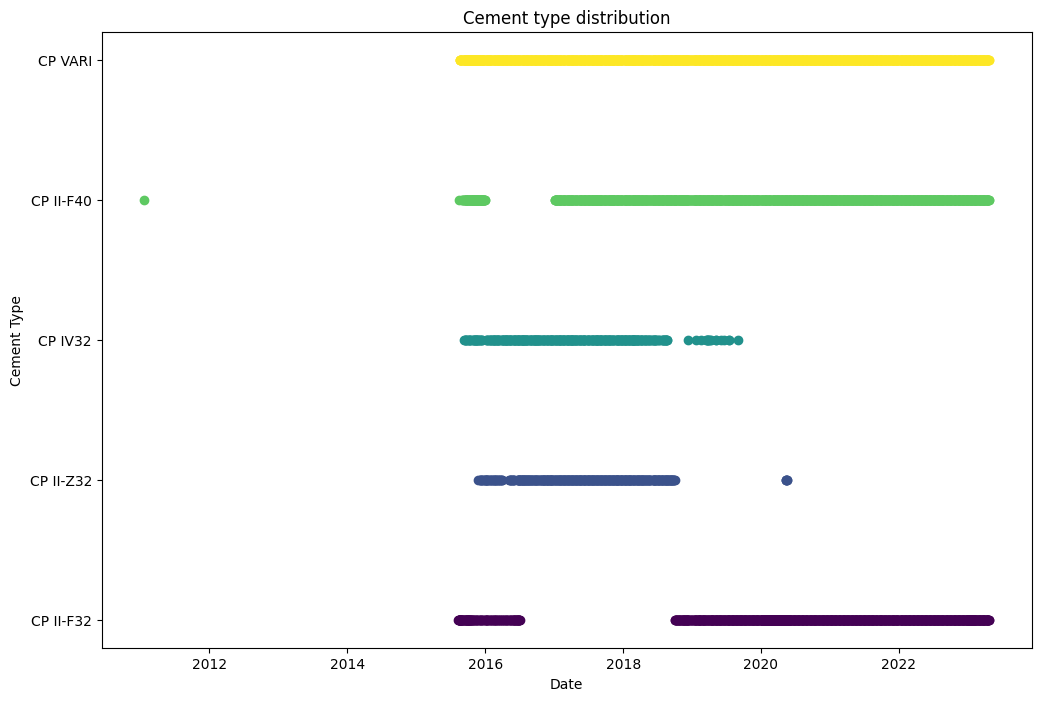

<IPython.core.display.Javascript object>

In [31]:
categories = df["Cement_Type"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

plt.figure(figsize=(12, 8))

for i, category in enumerate(categories):
    category_data = df[df["Cement_Type"] == category]
    plt.scatter(
        category_data["Date"], [i] * len(category_data), c=colors[i], label=category
    )
plt.yticks(range(len(categories)), categories)
# plt.legend()
plt.xlabel("Date")
plt.ylabel("Cement Type")
plt.title("Cement type distribution")
plt.show()

In [32]:
dates = df["Date"].copy()

<IPython.core.display.Javascript object>

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<Axes: title={'center': 'Unique Values per feature'}>

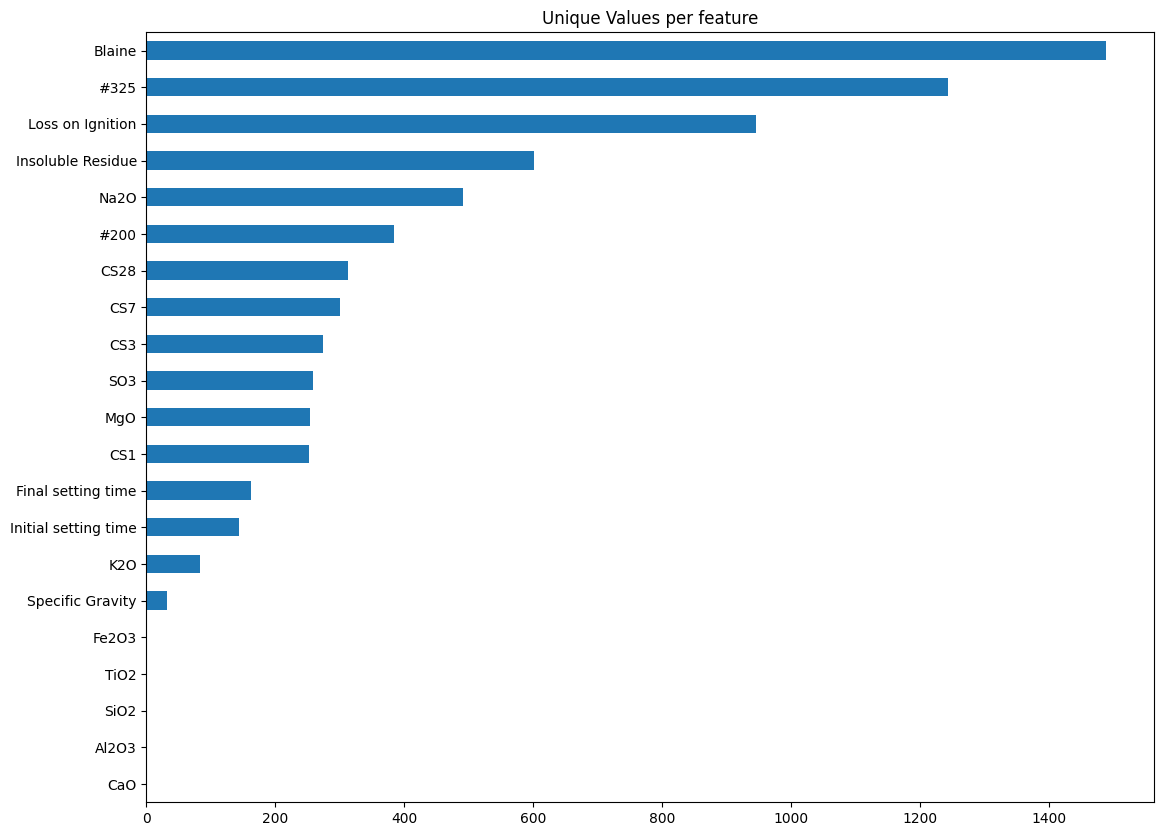

<IPython.core.display.Javascript object>

In [33]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.barh(logy=False, figsize=(13, 10), title="Unique Values per feature")

(array([0, 1, 2]),
 [Text(0, 0, 'Plant'), Text(1, 0, 'Cement_Type'), Text(2, 0, 'Date')])

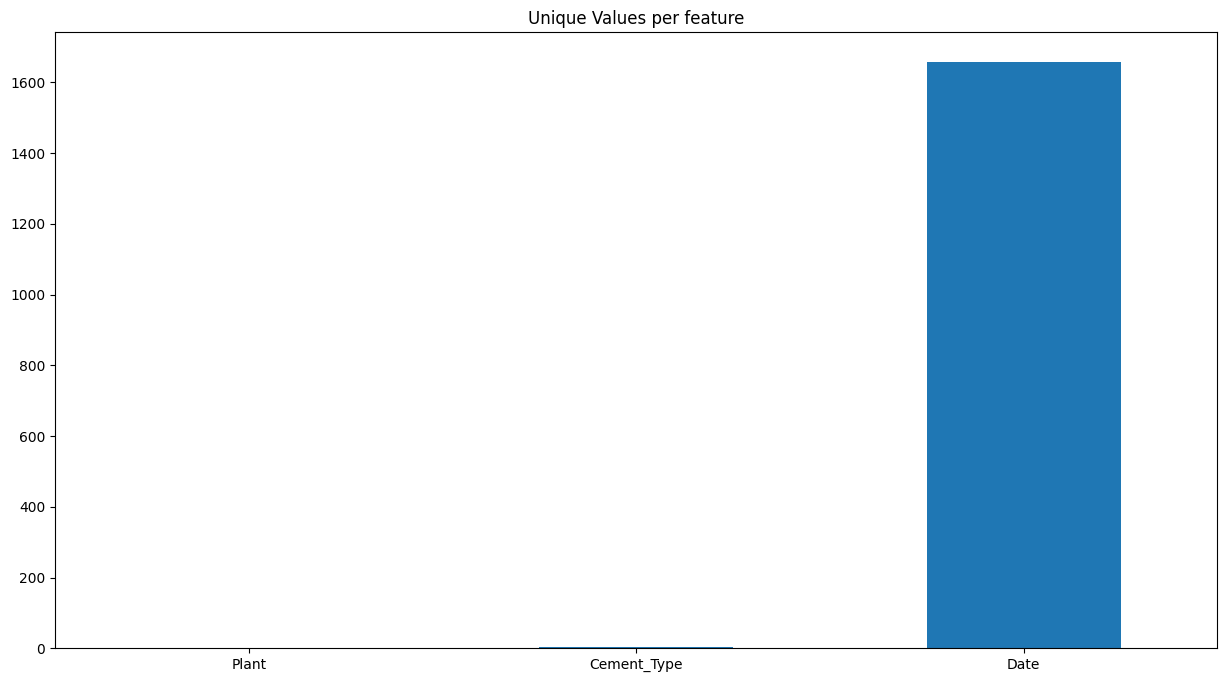

<IPython.core.display.Javascript object>

In [34]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'Plant'), Text(1, 0, 'Cement_Type')])

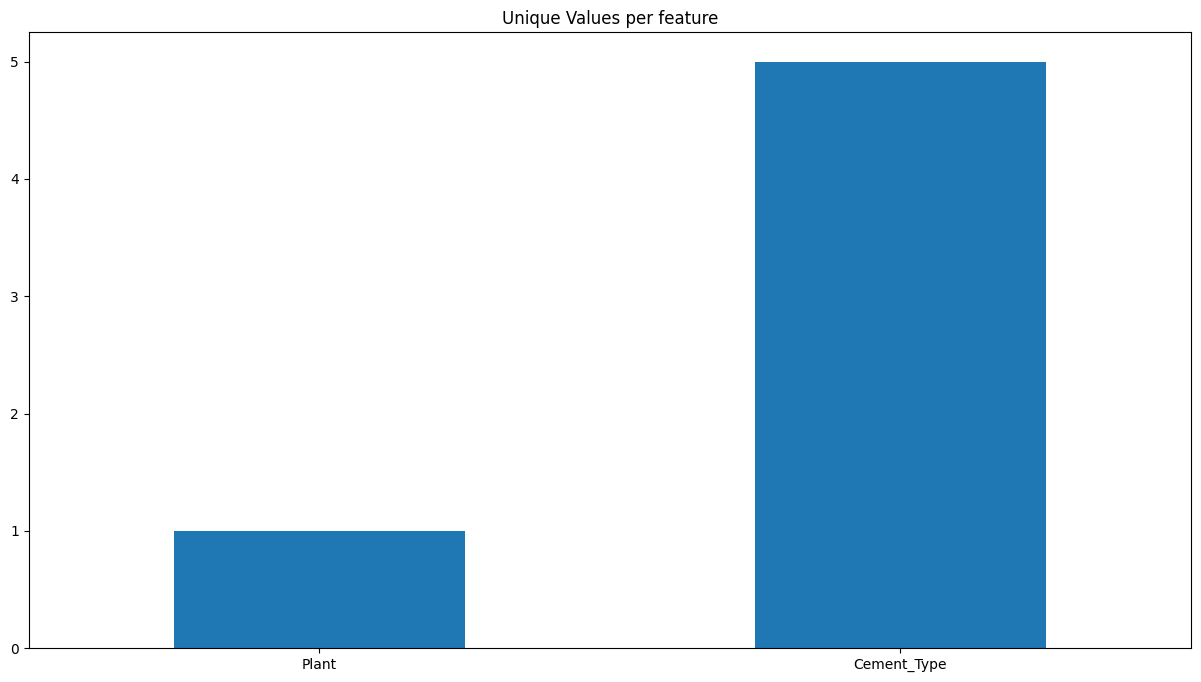

<IPython.core.display.Javascript object>

In [35]:
unique_values = (
    df.select_dtypes(exclude="number").drop("Date", axis=1).nunique().sort_values()
)

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [36]:
print(
    "There are",
    df.isna().any().sum(),
    "variables with missing values from a total of",
    df.shape[1],
)

There are 19 variables with missing values from a total of 24


<IPython.core.display.Javascript object>

In [37]:
df.isna().any()

Plant                   False
Date                    False
CaO                      True
MgO                      True
Na2O                     True
Al2O3                    True
SiO2                     True
SO3                      True
K2O                      True
TiO2                     True
Fe2O3                    True
Loss on Ignition         True
Insoluble Residue        True
Blaine                   True
#200                     True
#325                     True
Specific Gravity         True
Initial setting time    False
Final setting time      False
CS1                      True
CS3                      True
CS7                      True
CS28                     True
Cement_Type             False
dtype: bool

<IPython.core.display.Javascript object>

In [38]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [39]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<BarContainer object of 24 artists>

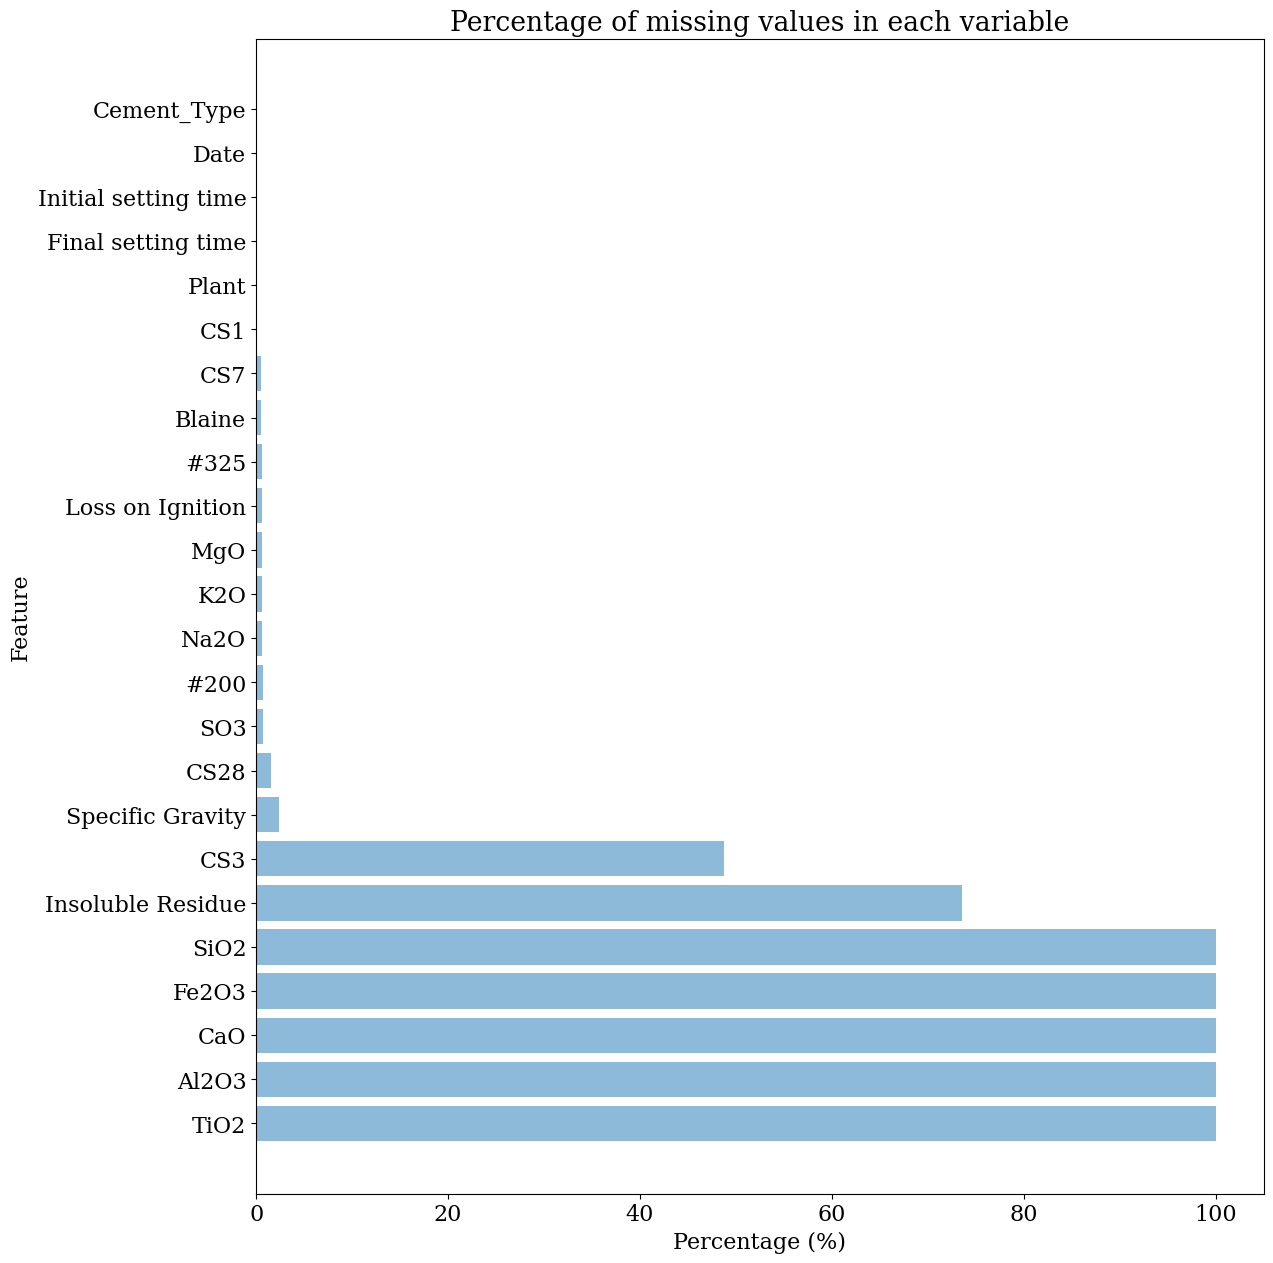

<IPython.core.display.Javascript object>

In [40]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

### Missing values per cement type

In [41]:
missing_values = []
for cem_type, group in df.groupby("Cement_Type"):
    missing_percentages = (group.isna().sum() / group.shape[0]) * 100
    missing_percentages = missing_percentages.sort_values(ascending=False)
    missing_percentages = missing_percentages.to_frame(
        name=f"Missing (%) for {cem_type}"
    )
    missing_values.append(missing_percentages.T)

result = pd.concat(missing_values)
result.T.style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

## Percentage of zeros each variable

In [42]:
zero_values = {}
for col in df.select_dtypes(include="number").columns:
    zero_percentages = (df[df[col].eq(0)].shape[0] / df.shape[0]) * 100
    zero_values[col] = zero_percentages

zero_percentages = pd.Series(zero_values, name=f"Zero (%) for {plant}")
zero_percentages = zero_percentages.sort_values(ascending=False)
zero_percentages = zero_percentages.to_frame(name=f"Zero (%) for {plant}")
zero_percentages.style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<h3>2.4. Duplicates</h3>

In [43]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 87 duplicates samples.


<IPython.core.display.Javascript object>

<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

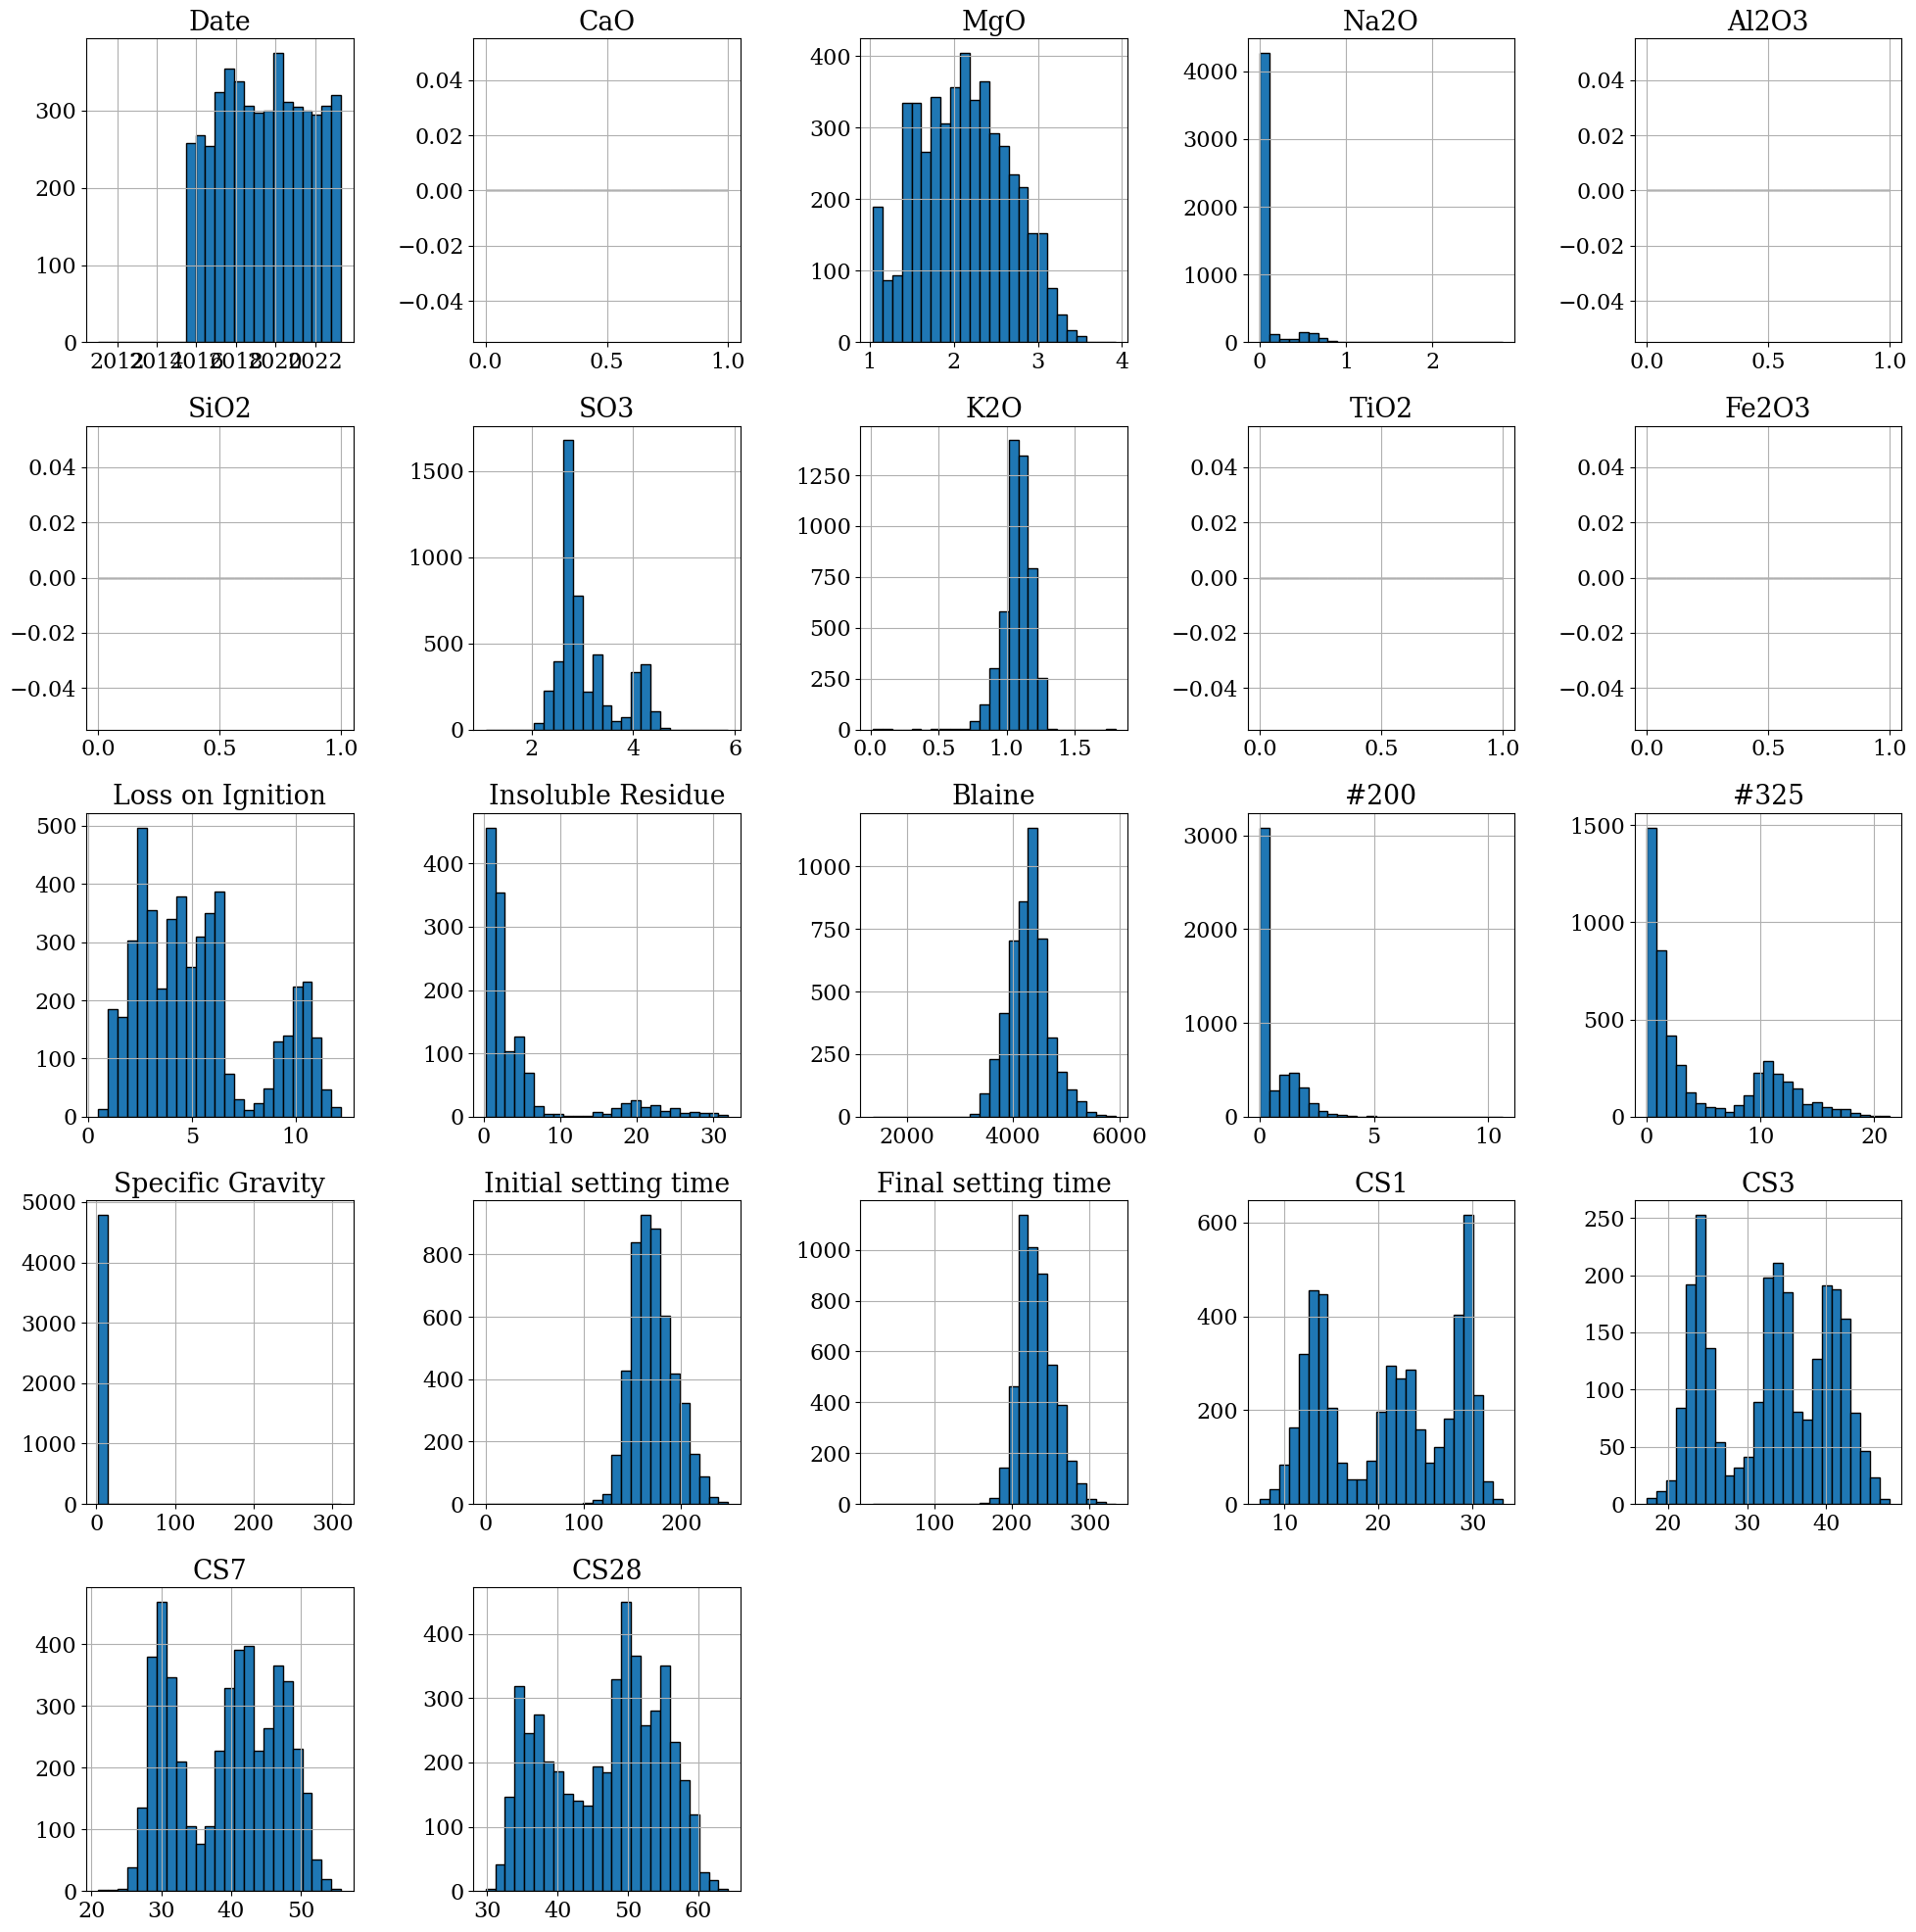

<IPython.core.display.Javascript object>

In [44]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

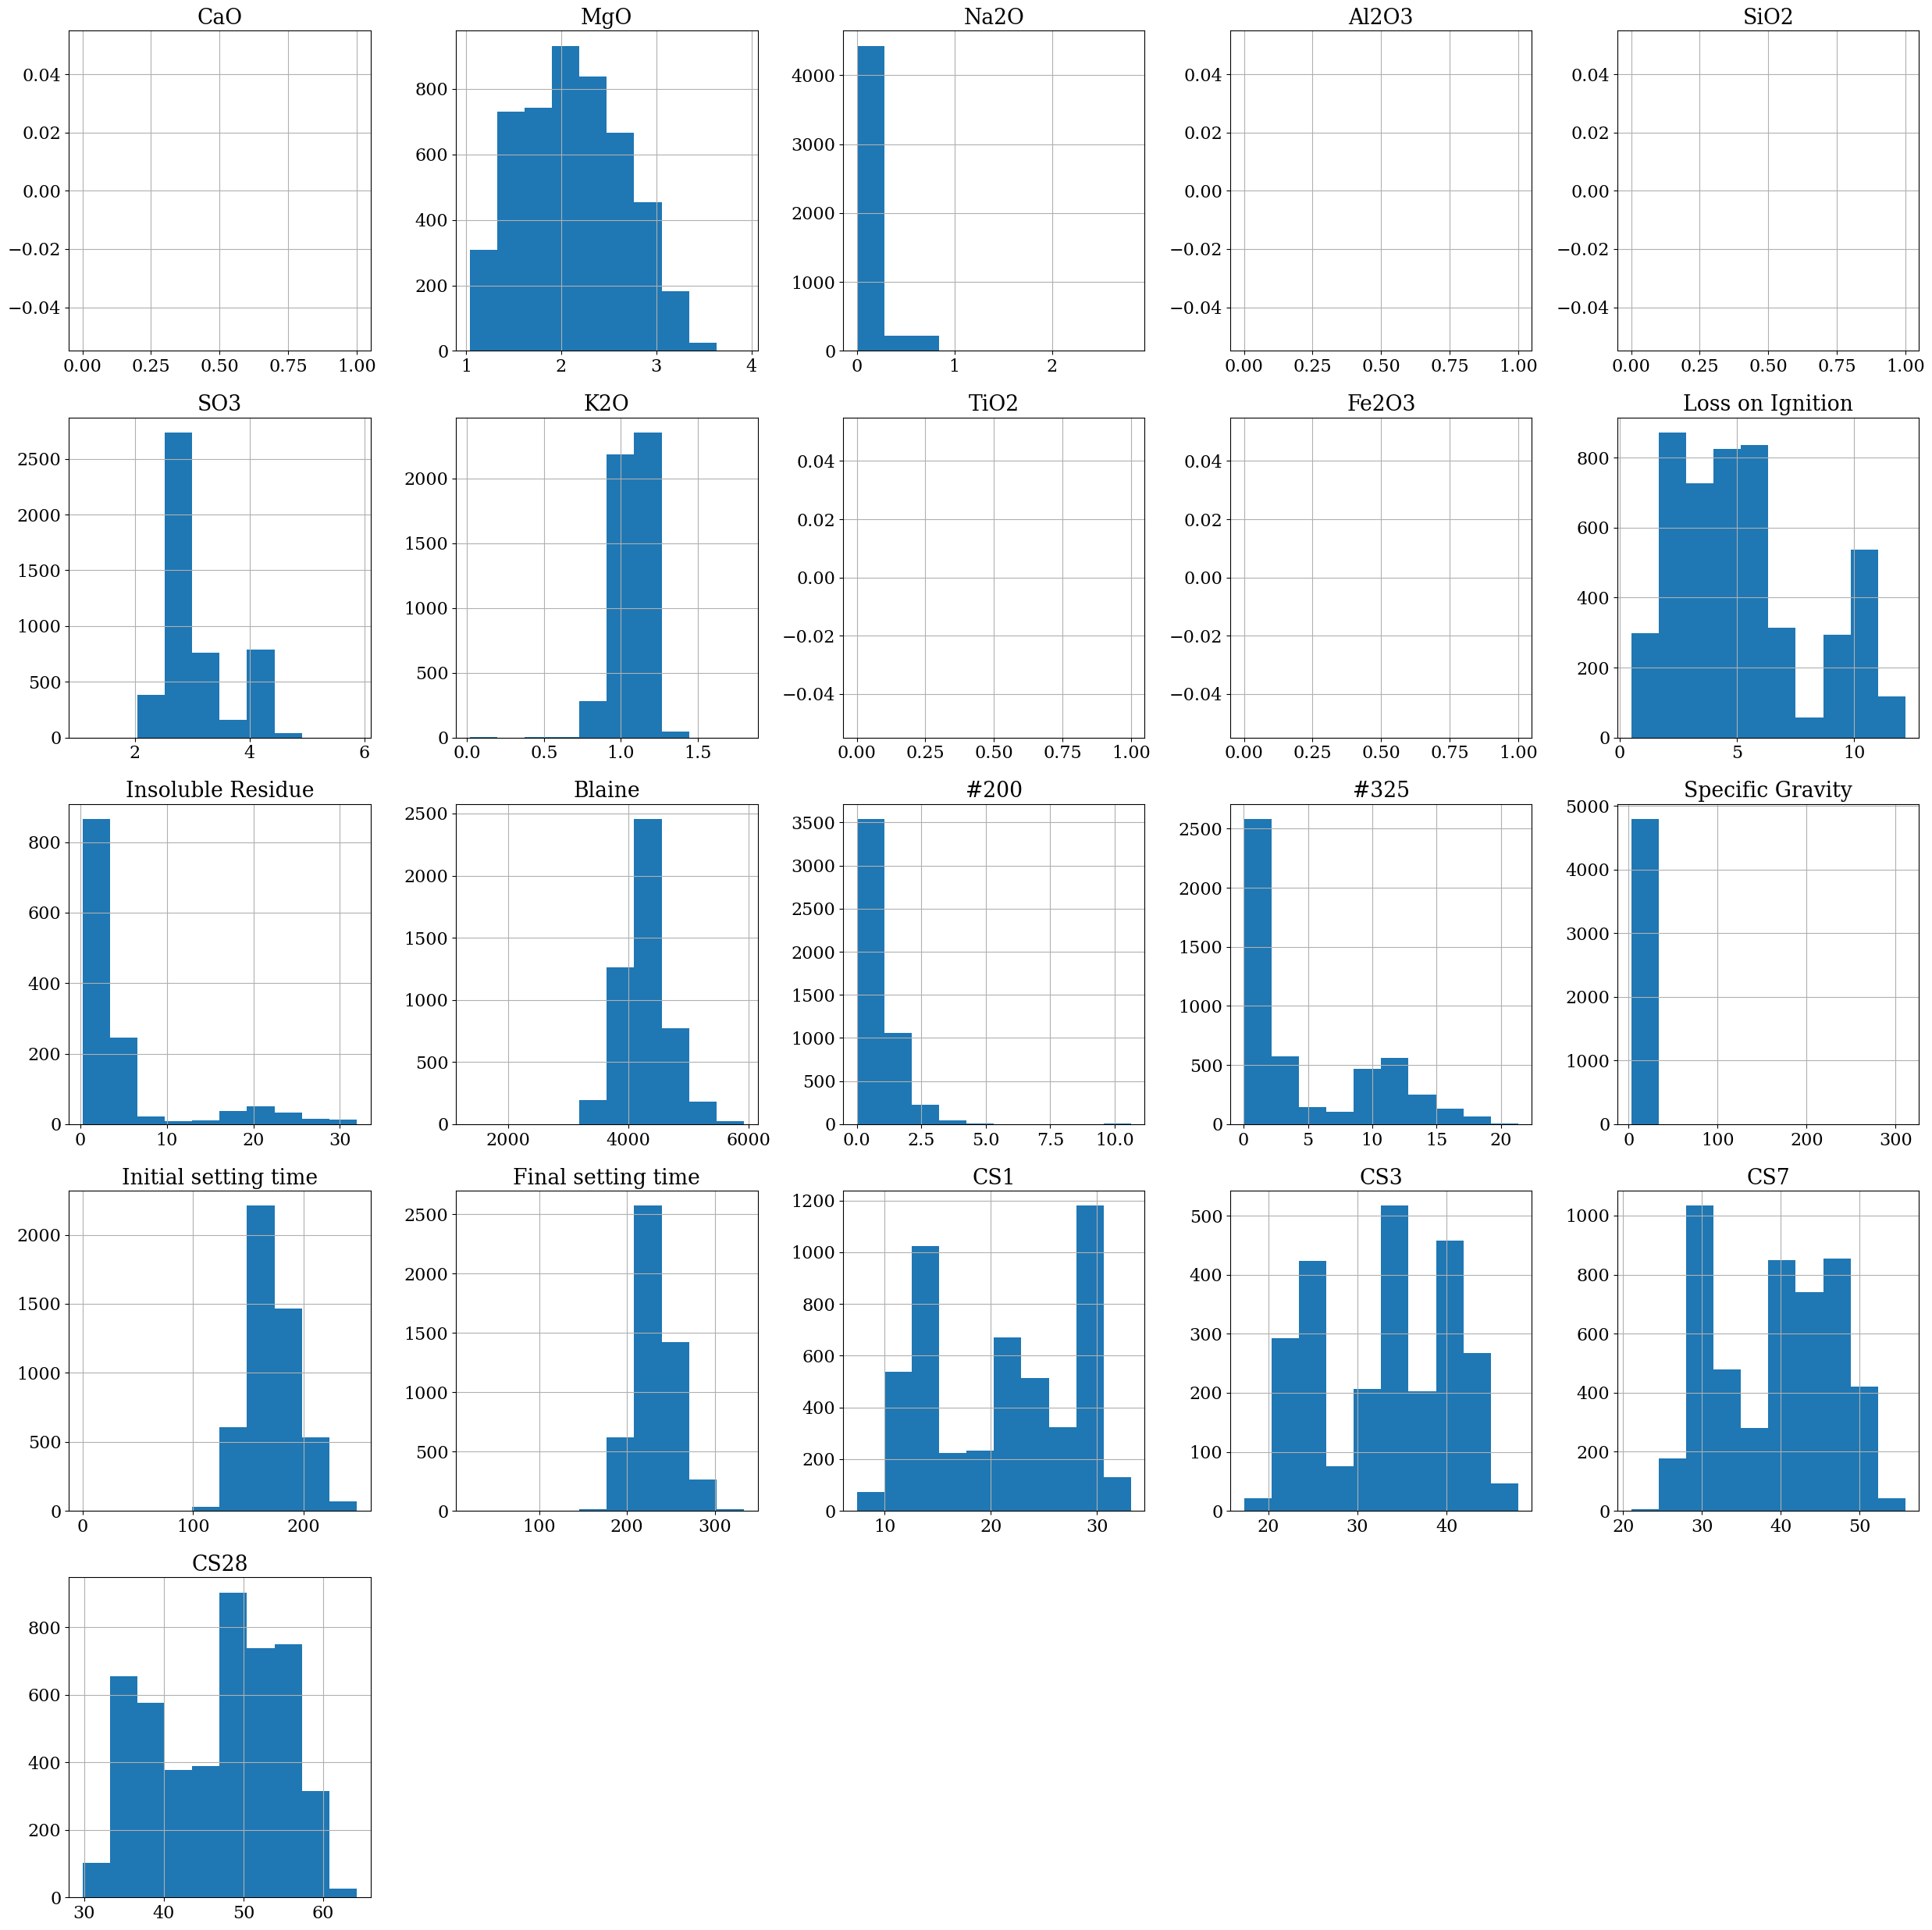

<IPython.core.display.Javascript object>

In [45]:
df.select_dtypes(include="float64").hist(
    figsize=(25, 25),
)
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

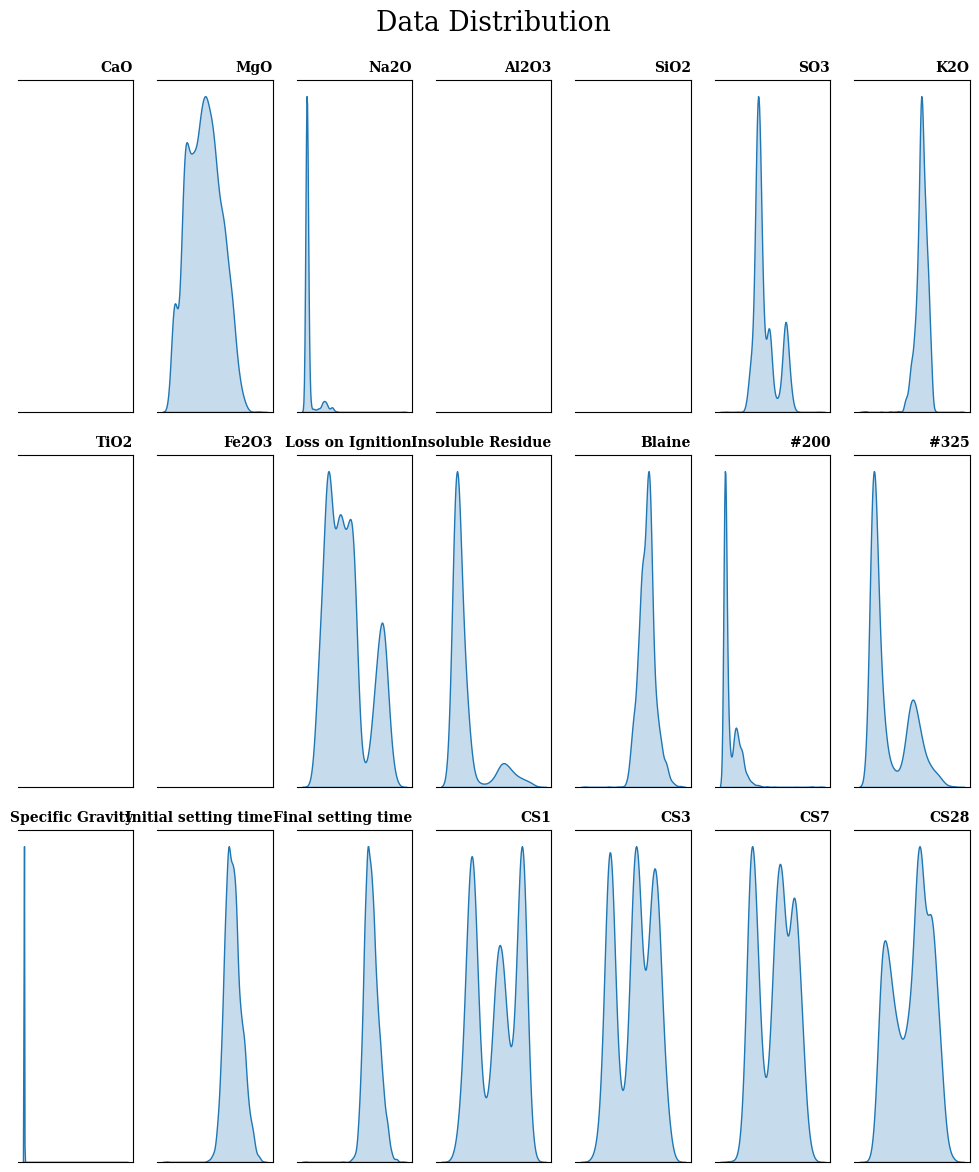

<IPython.core.display.Javascript object>

In [46]:
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(3, 7, figsize=(10, 12))
axes = axes.flatten()
# sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], fill=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

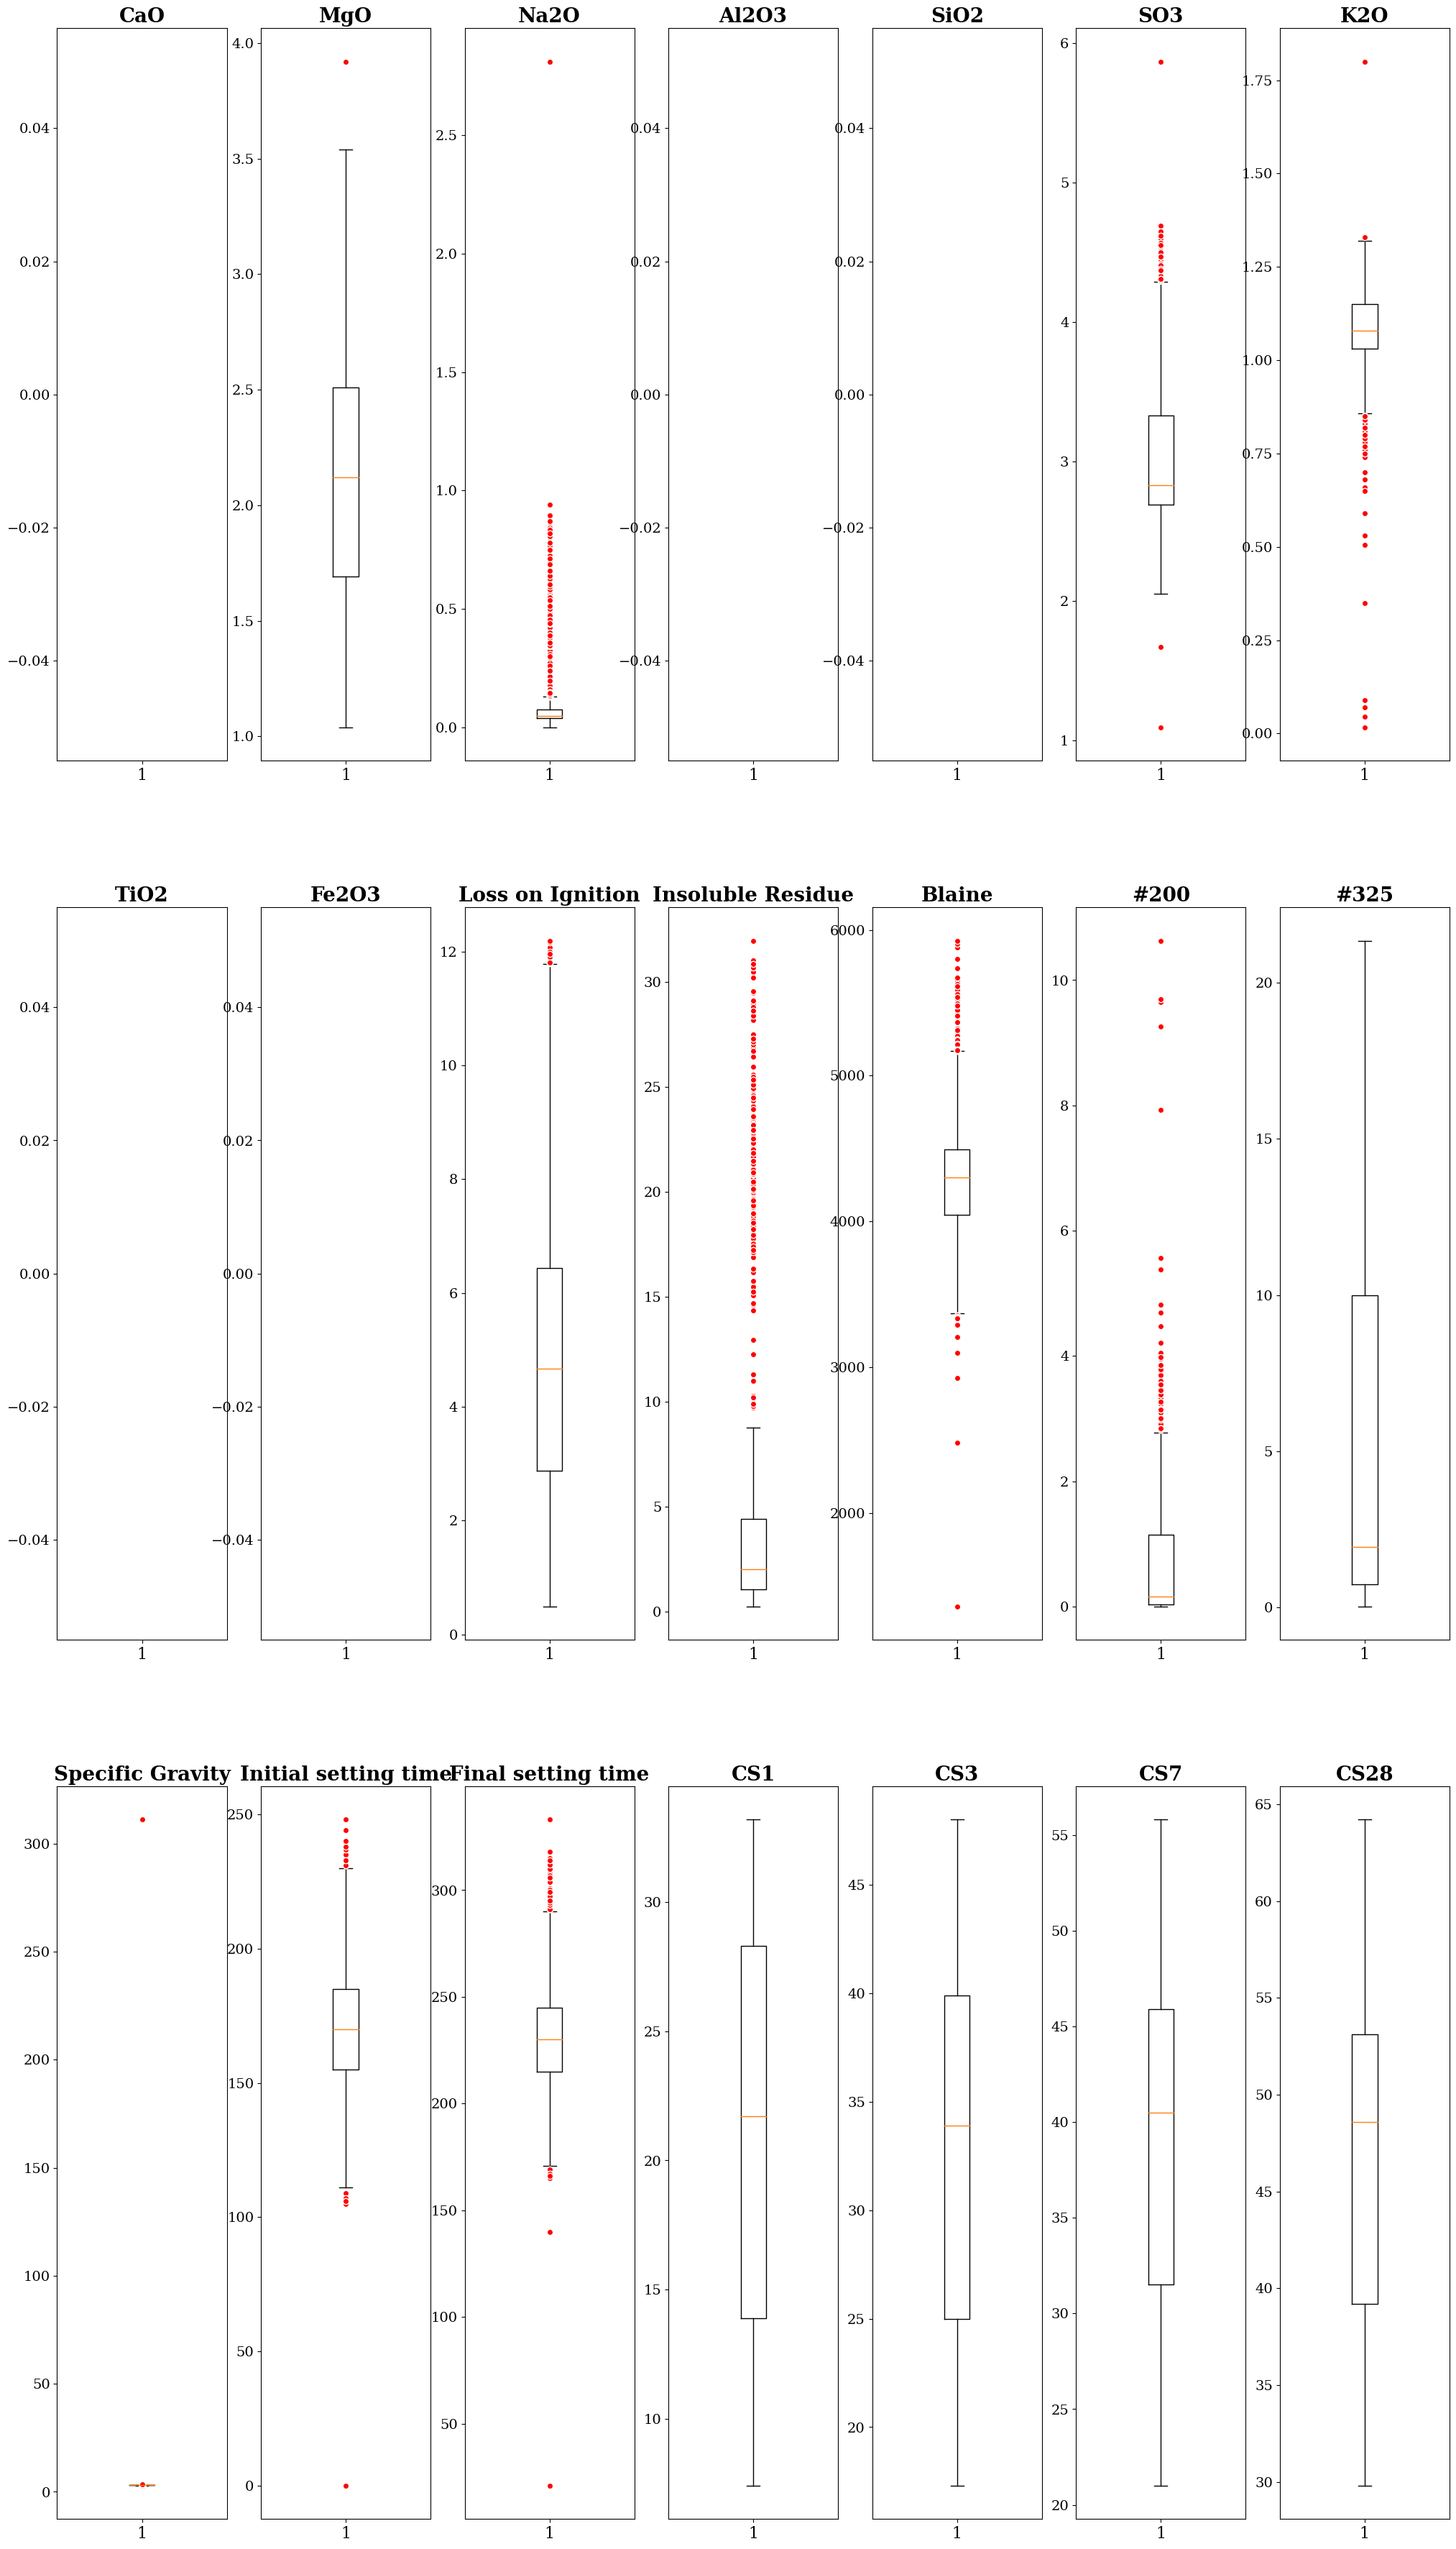

<IPython.core.display.Javascript object>

In [47]:
# Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include="float64").columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(3, 7, figsize=(25, 45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:, i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)

<h3>3.3. Feature Relationship</h3>

<h4>3.3.1 Pearson</h4>

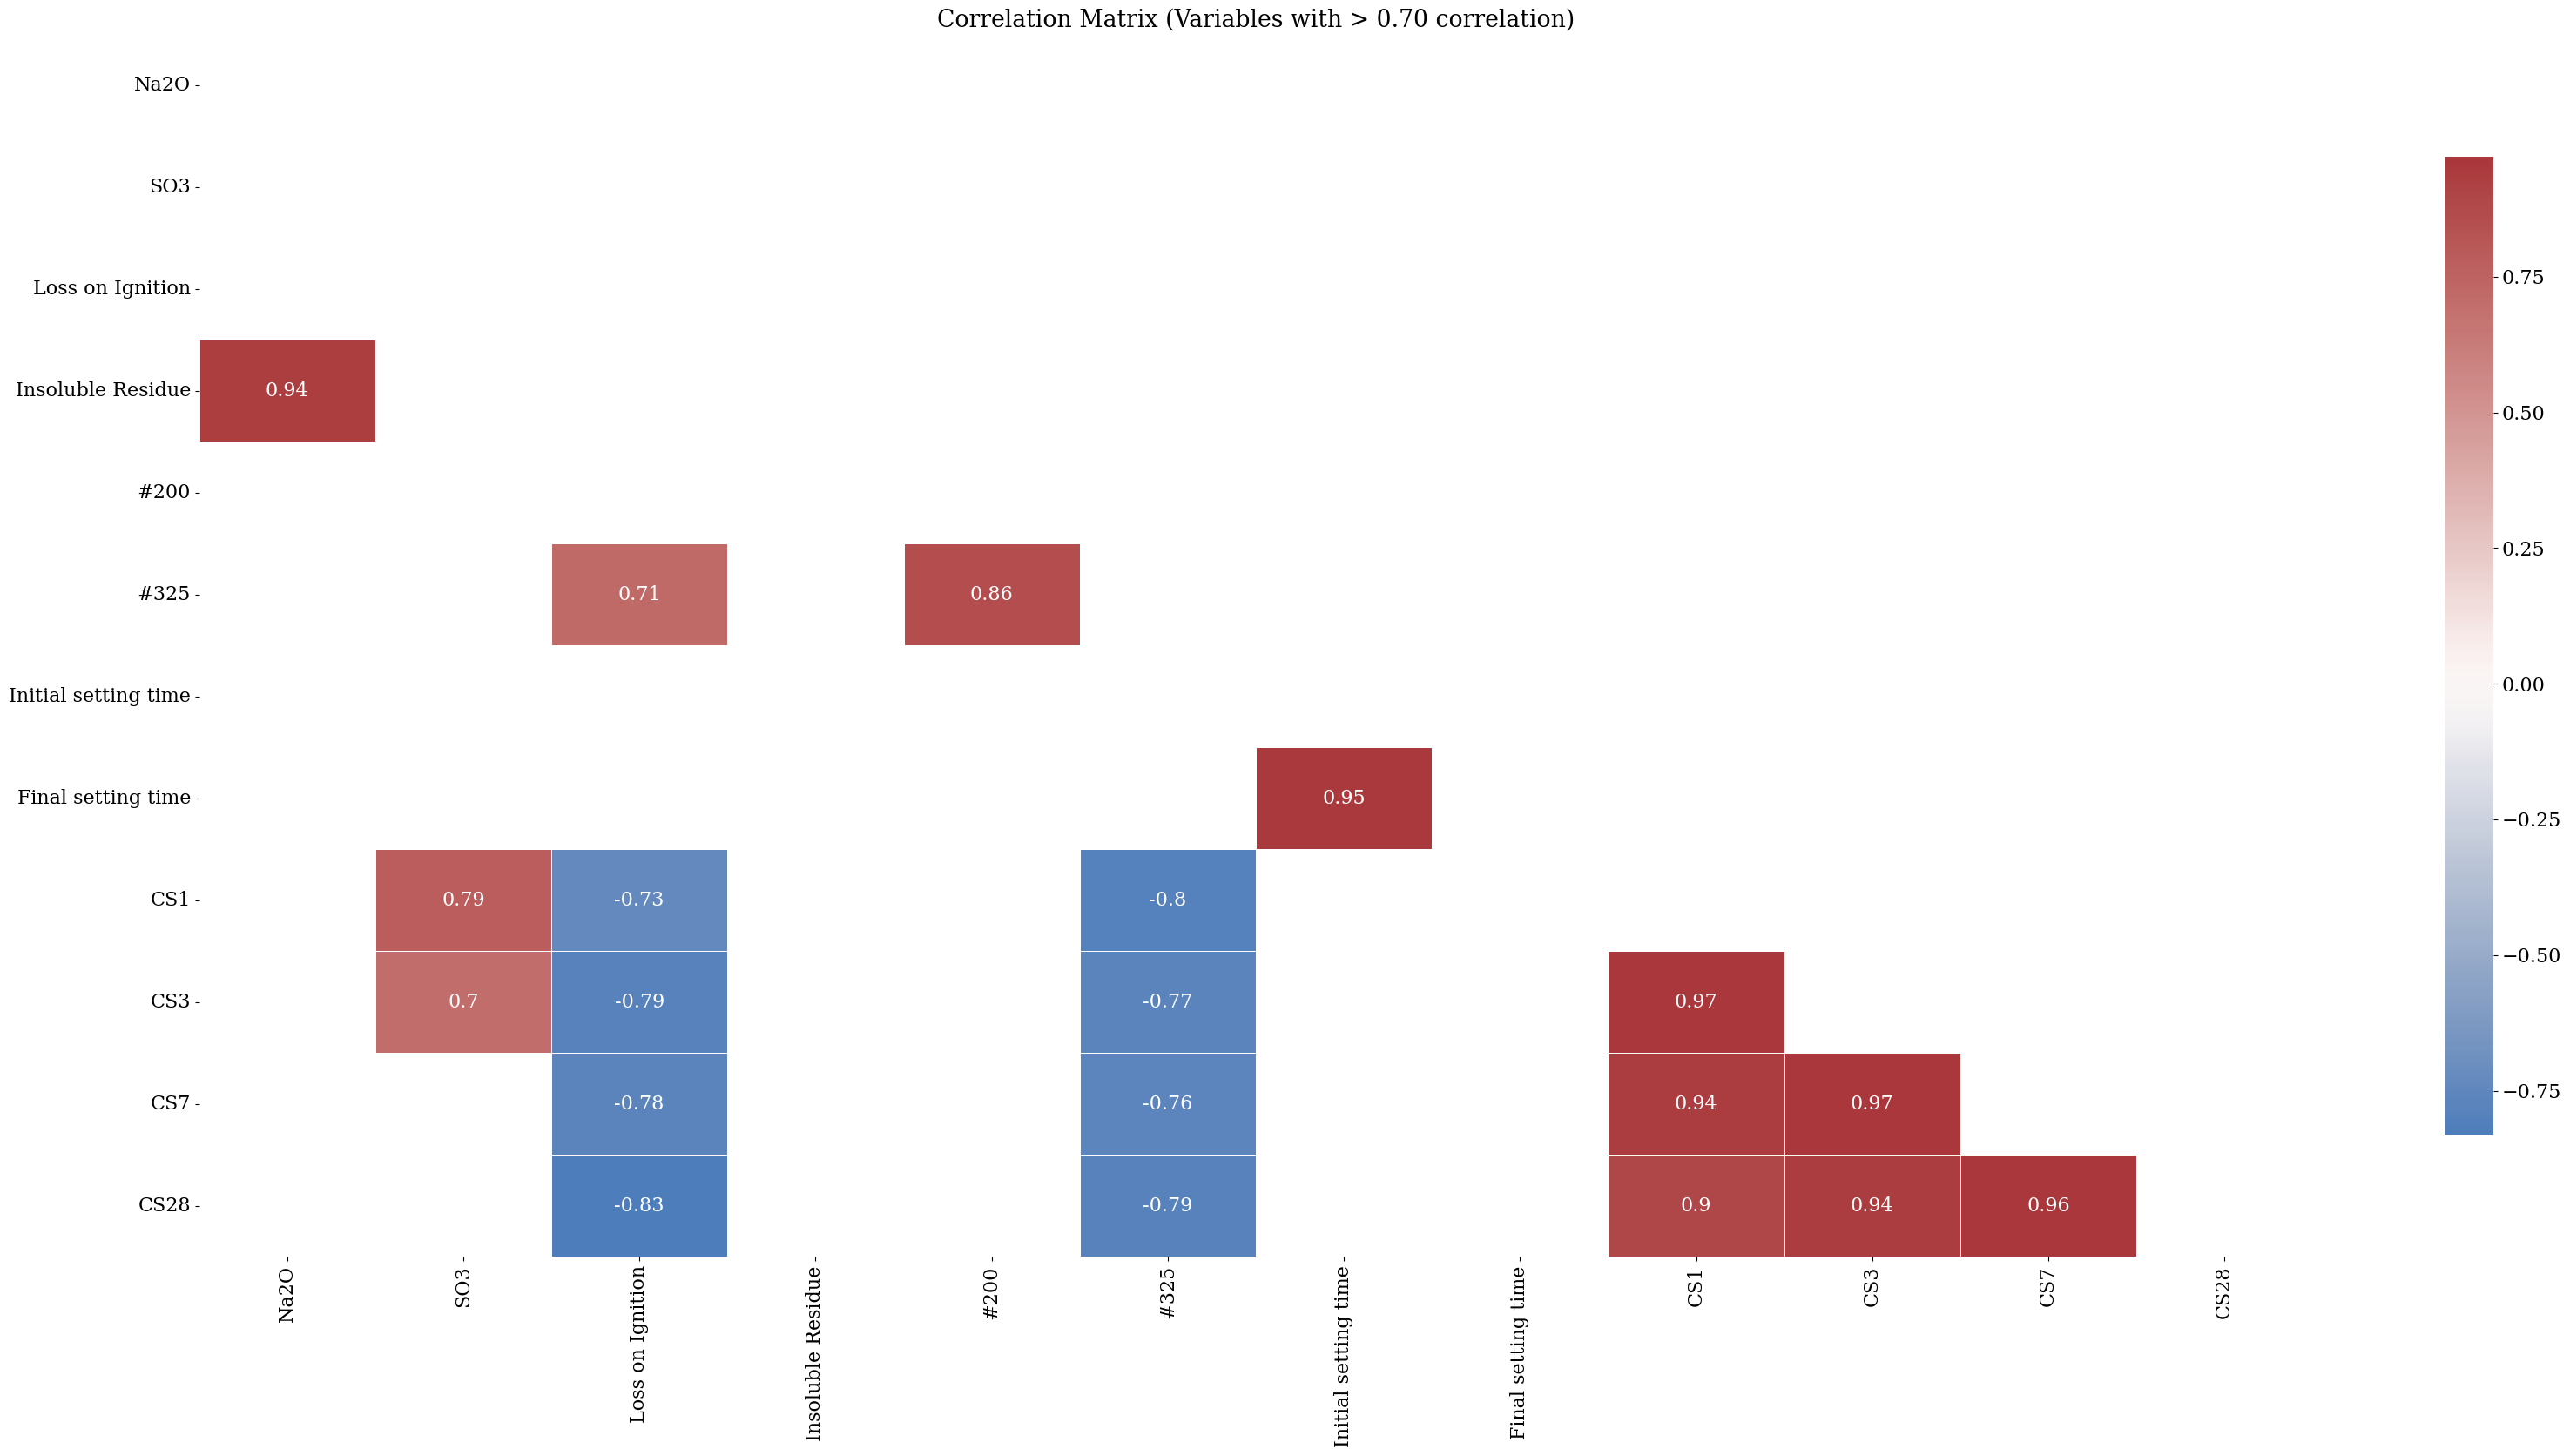

<IPython.core.display.Javascript object>

In [48]:
df_corr = df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="pearson")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [49]:
corr_matrix = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="pearson").abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

CS3                   CS7                   0.971280
CS1                   CS3                   0.965922
CS7                   CS28                  0.961364
Initial setting time  Final setting time    0.950341
CS3                   CS28                  0.940799
CS1                   CS7                   0.939345
Na2O                  Insoluble Residue     0.935442
CS1                   CS28                  0.899507
#200                  #325                  0.858613
Loss on Ignition      CS28                  0.830752
#325                  CS1                   0.796742
                      CS28                  0.791158
Loss on Ignition      CS3                   0.790776
SO3                   CS1                   0.785505
Loss on Ignition      CS7                   0.779495
#325                  CS3                   0.768443
                      CS7                   0.763813
Loss on Ignition      CS1                   0.732818
                      #325                  0.

<IPython.core.display.Javascript object>

In [50]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.961364
CS3                   CS28    0.940799
CS1                   CS28    0.899507
Loss on Ignition      CS28    0.830752
#325                  CS28    0.791158
#200                  CS28    0.664649
SO3                   CS28    0.621145
Final setting time    CS28    0.441016
MgO                   CS28    0.440429
Initial setting time  CS28    0.439727
Insoluble Residue     CS28    0.418070
Blaine                CS28    0.346718
Na2O                  CS28    0.180973
K2O                   CS28    0.050819
Specific Gravity      CS28    0.025628
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.2 Spearman</h4>

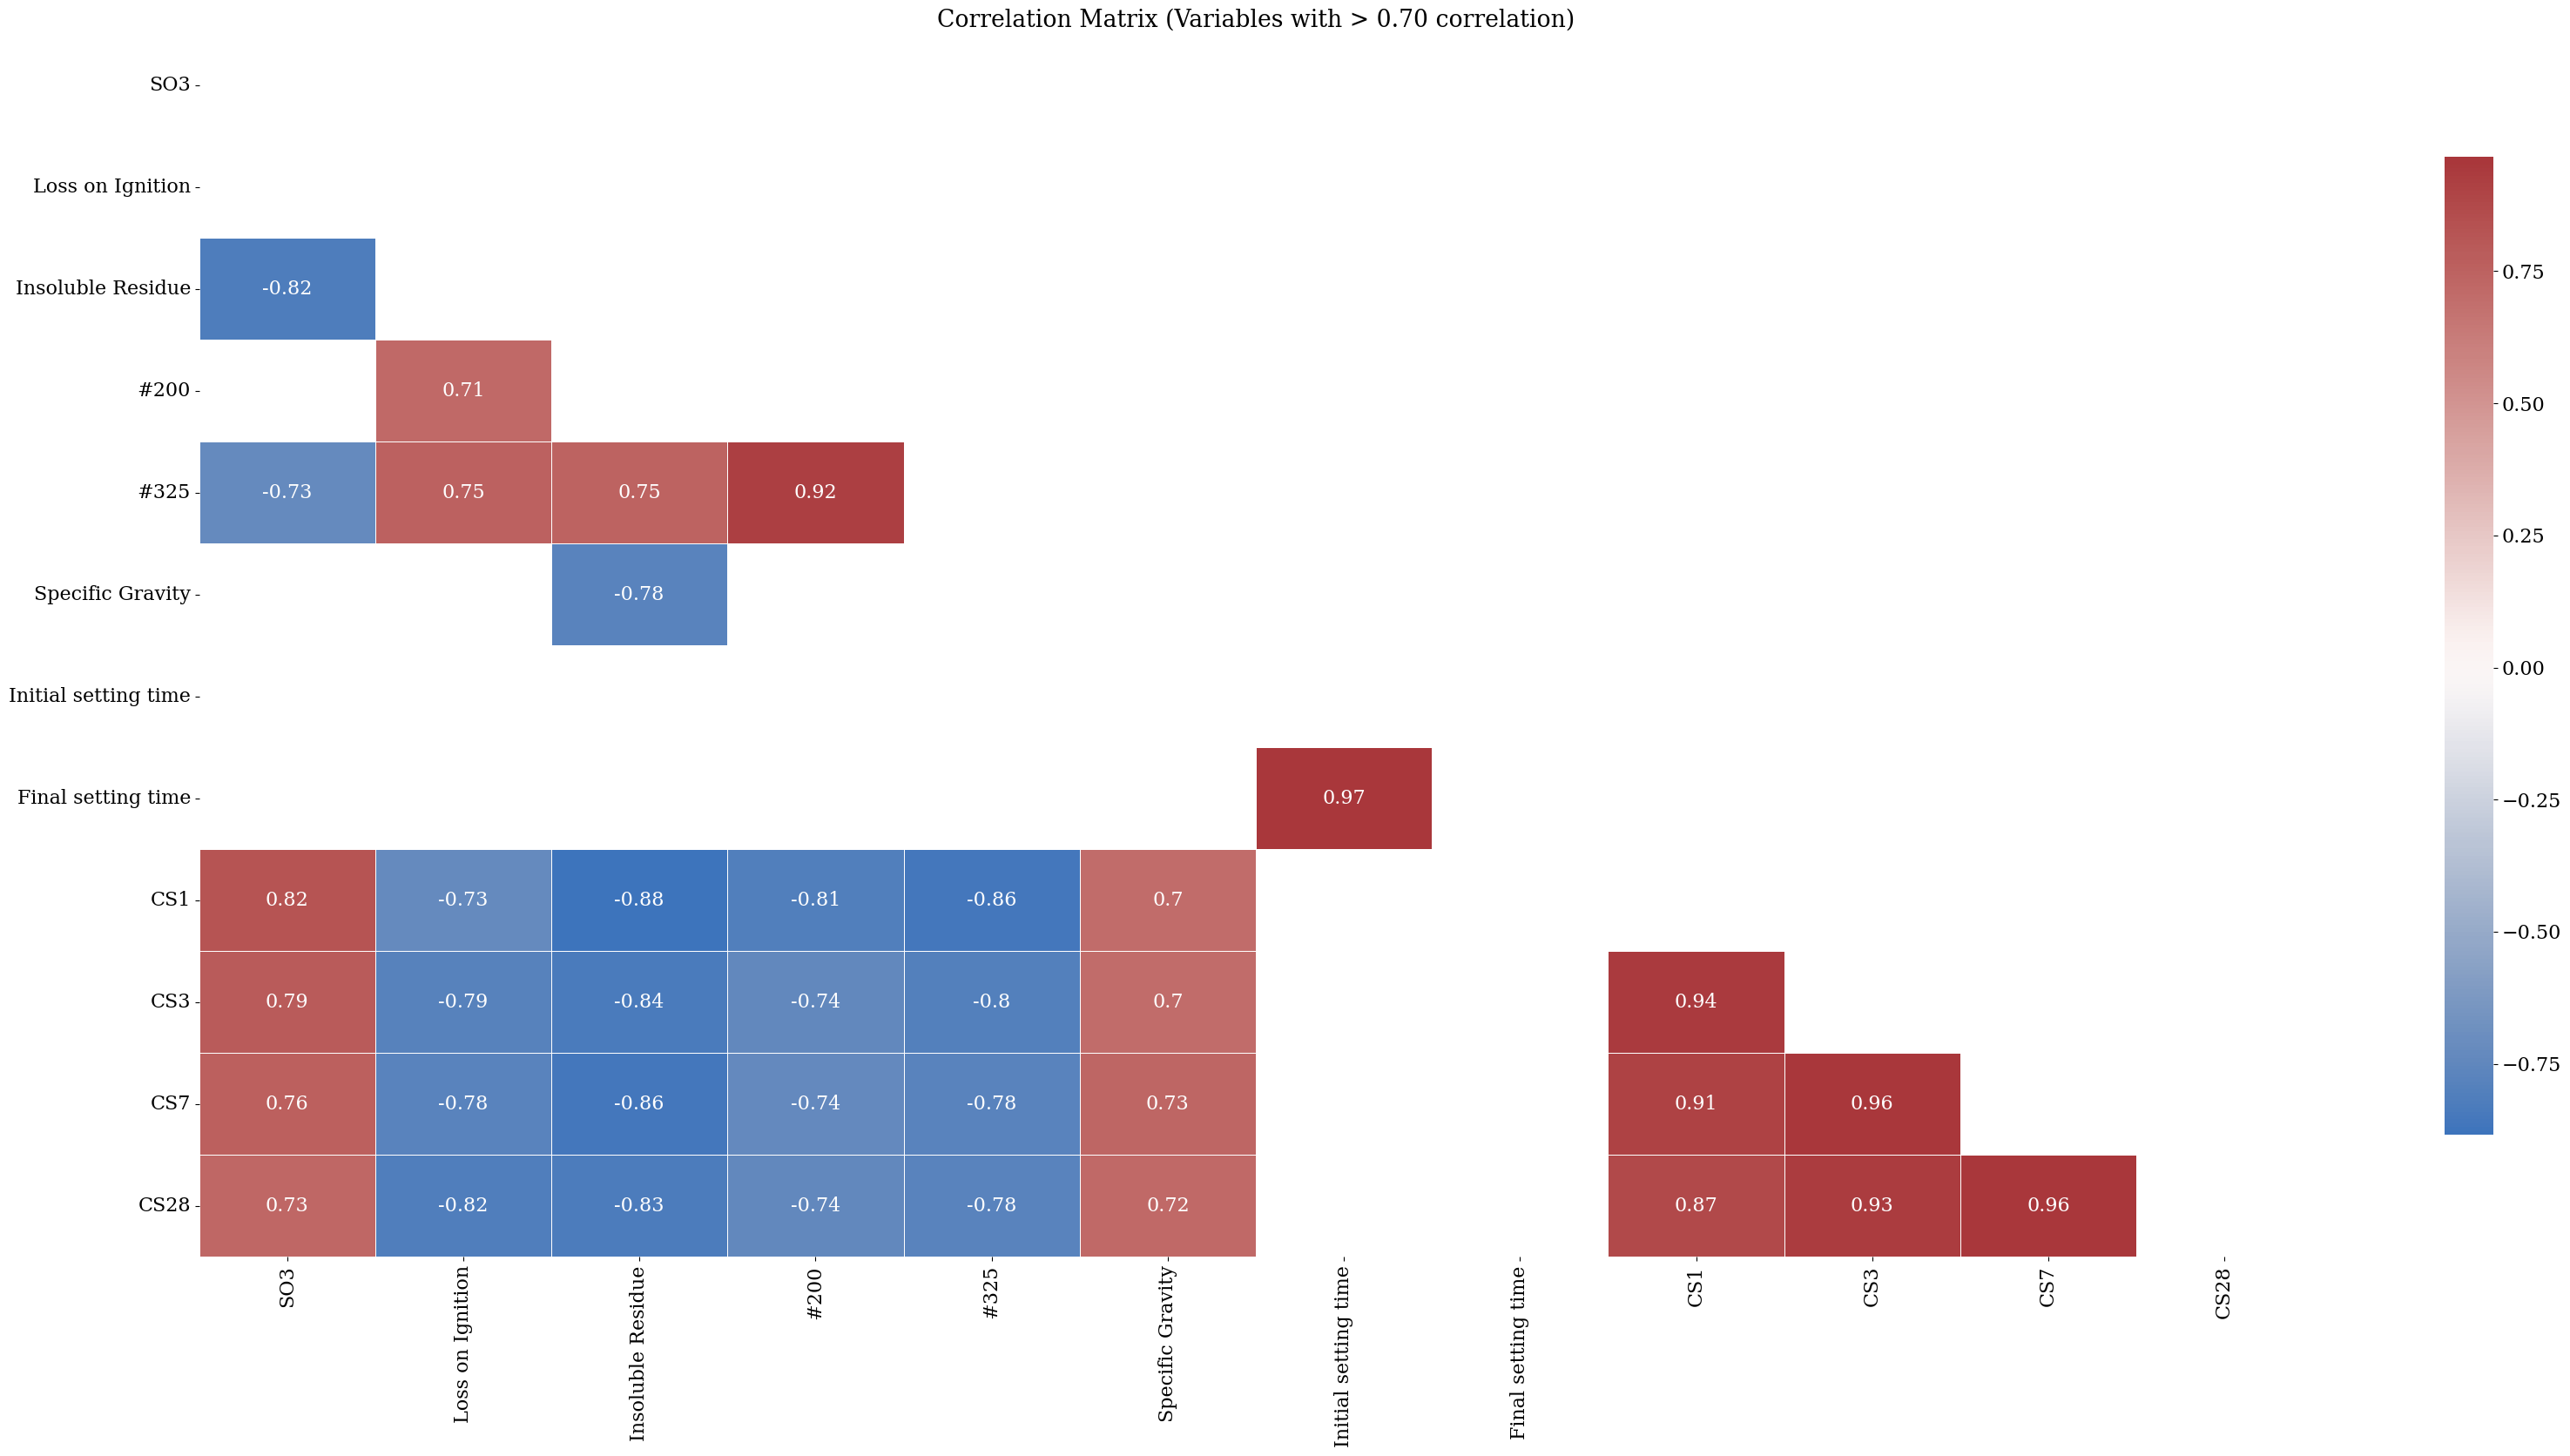

<IPython.core.display.Javascript object>

In [51]:
df_corr = df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="spearman")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [52]:
corr_matrix = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="spearman").abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Initial setting time  Final setting time    0.967178
CS7                   CS28                  0.958190
CS3                   CS7                   0.955409
CS1                   CS3                   0.943605
CS3                   CS28                  0.932081
#200                  #325                  0.923298
CS1                   CS7                   0.908193
Insoluble Residue     CS1                   0.884273
CS1                   CS28                  0.873580
#325                  CS1                   0.861314
Insoluble Residue     CS7                   0.858922
                      CS3                   0.840140
                      CS28                  0.830499
SO3                   CS1                   0.823323
                      Insoluble Residue     0.821626
Loss on Ignition      CS28                  0.817378
#200                  CS1                   0.805569
#325                  CS3                   0.802282
SO3                   CS3                   0.

<IPython.core.display.Javascript object>

In [53]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.958190
CS3                   CS28    0.932081
CS1                   CS28    0.873580
Insoluble Residue     CS28    0.830499
Loss on Ignition      CS28    0.817378
#325                  CS28    0.782265
#200                  CS28    0.742597
SO3                   CS28    0.725453
Specific Gravity      CS28    0.716916
MgO                   CS28    0.464351
Blaine                CS28    0.450901
Final setting time    CS28    0.439983
Initial setting time  CS28    0.429351
K2O                   CS28    0.104371
Na2O                  CS28    0.069253
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.1 Kendall</h4>

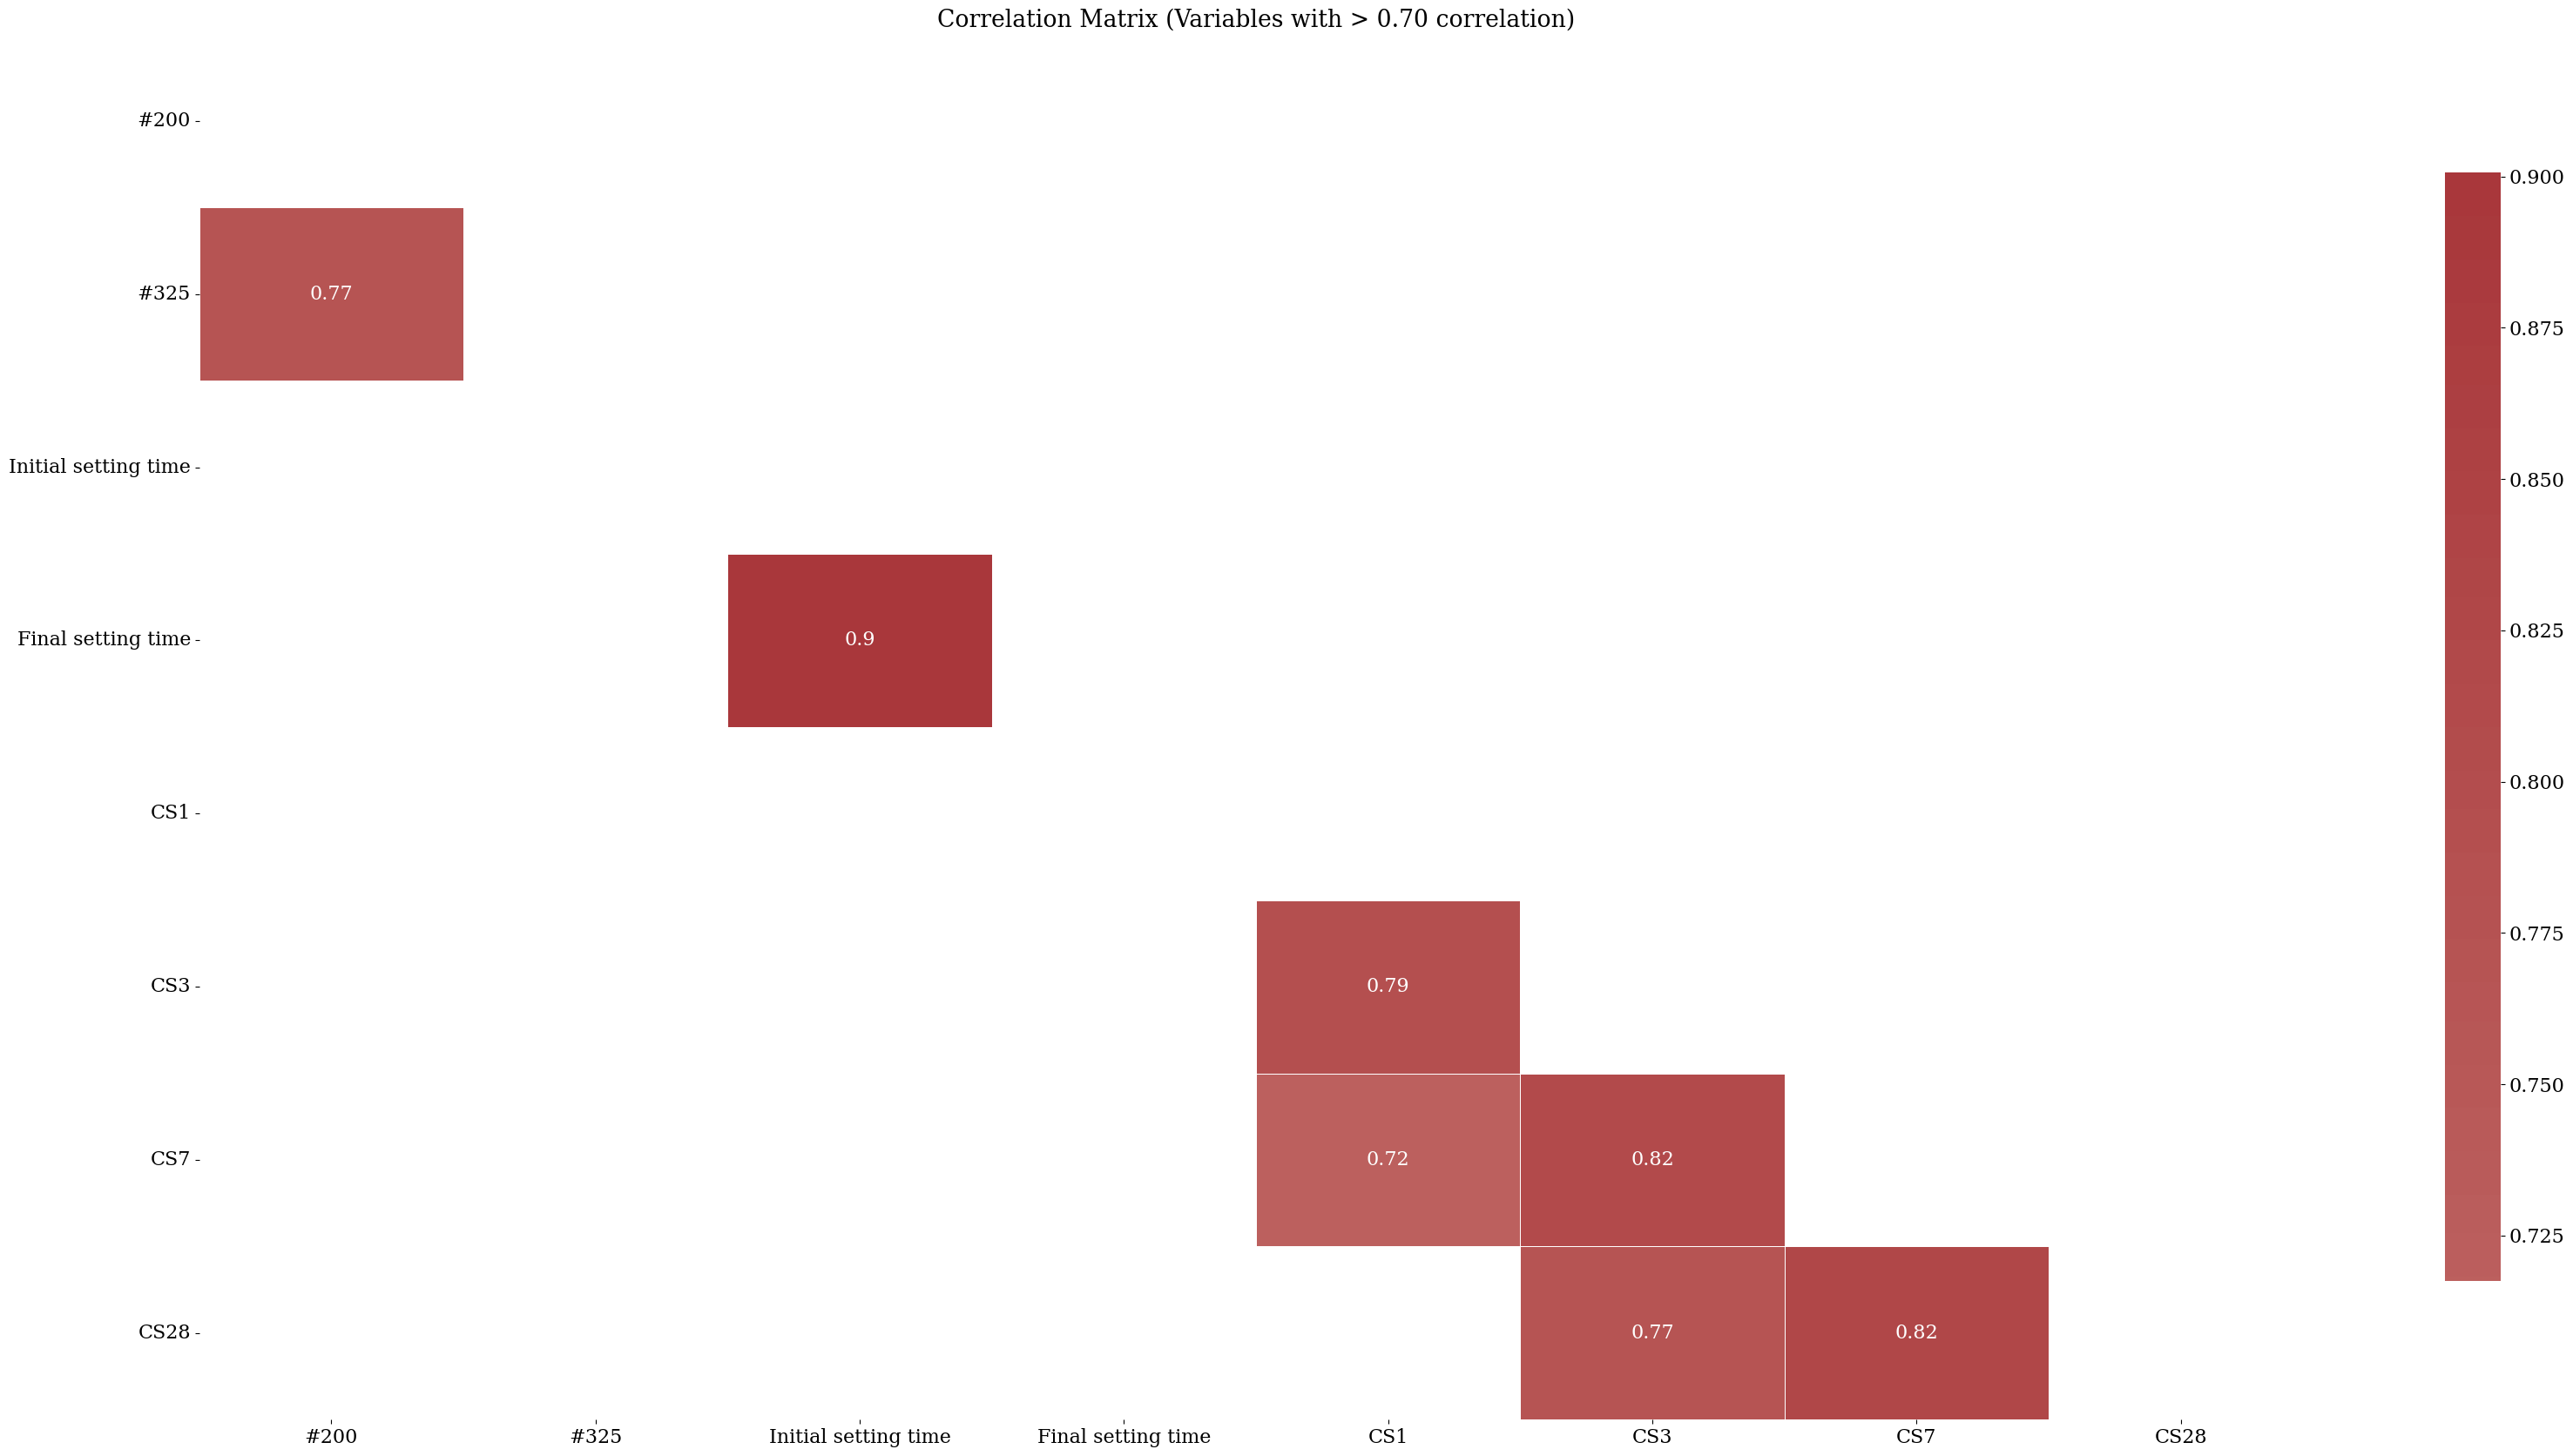

<IPython.core.display.Javascript object>

In [54]:
df_corr = df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="kendall")

# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]

df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)

if len(df_corr) > 0:
    labels = np.where(
        np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
    )

    plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
    # plt.show()

    sns.heatmap(
        df_corr,
        mask=np.triu(np.ones_like(df_corr, dtype=bool)),
        square=False,
        center=0,
        annot=labels,
        fmt="",
        linewidths=0.5,
        cmap="vlag",
        cbar_kws={"shrink": 0.8},
        ax=ax,
    )

    plt.tight_layout()

In [55]:
corr_matrix = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="kendall").abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Initial setting time  Final setting time    0.900589
CS7                   CS28                  0.823973
CS3                   CS7                   0.815657
CS1                   CS3                   0.788293
#200                  #325                  0.772391
CS3                   CS28                  0.768988
CS1                   CS7                   0.717464
dtype: float64

<IPython.core.display.Javascript object>

In [56]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.823973
CS3                   CS28    0.768988
CS1                   CS28    0.660570
Loss on Ignition      CS28    0.624213
Insoluble Residue     CS28    0.601319
#325                  CS28    0.548707
#200                  CS28    0.523095
Specific Gravity      CS28    0.522280
SO3                   CS28    0.493552
MgO                   CS28    0.320546
Blaine                CS28    0.297690
Final setting time    CS28    0.293266
Initial setting time  CS28    0.287599
K2O                   CS28    0.071300
Na2O                  CS28    0.044744
dtype: float64

<IPython.core.display.Javascript object>

#### Bivariate Analysis

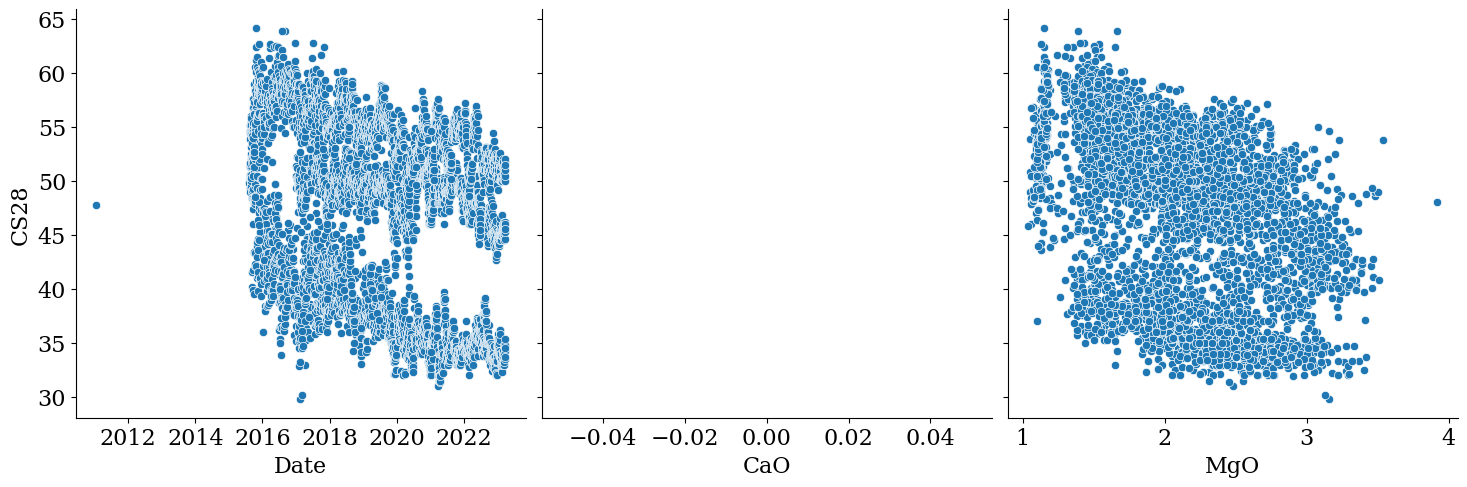

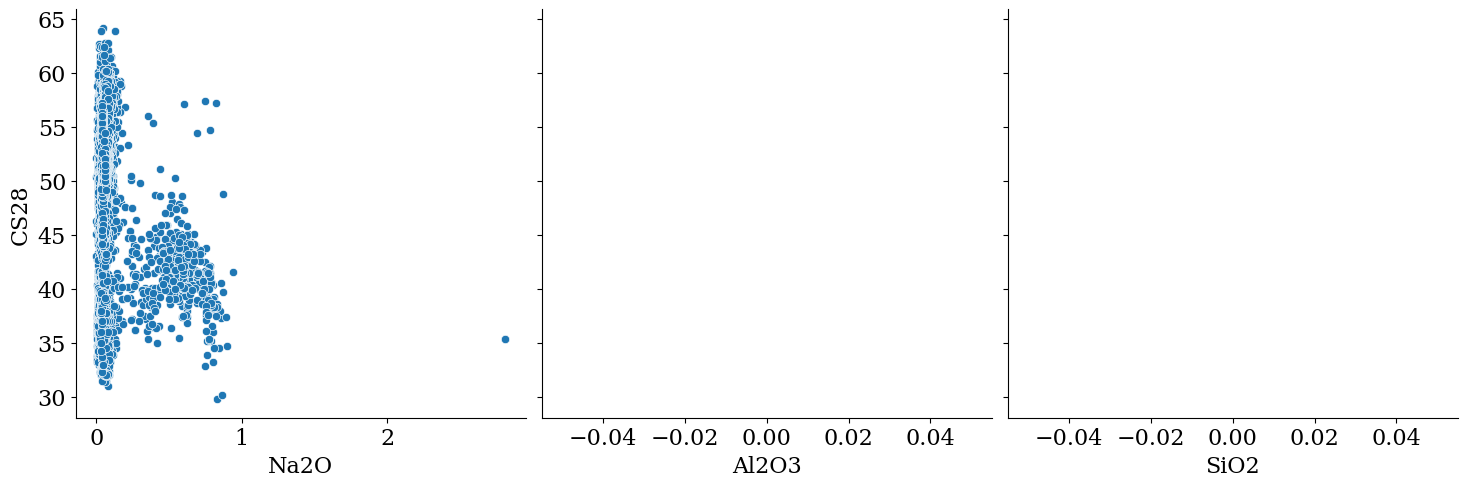

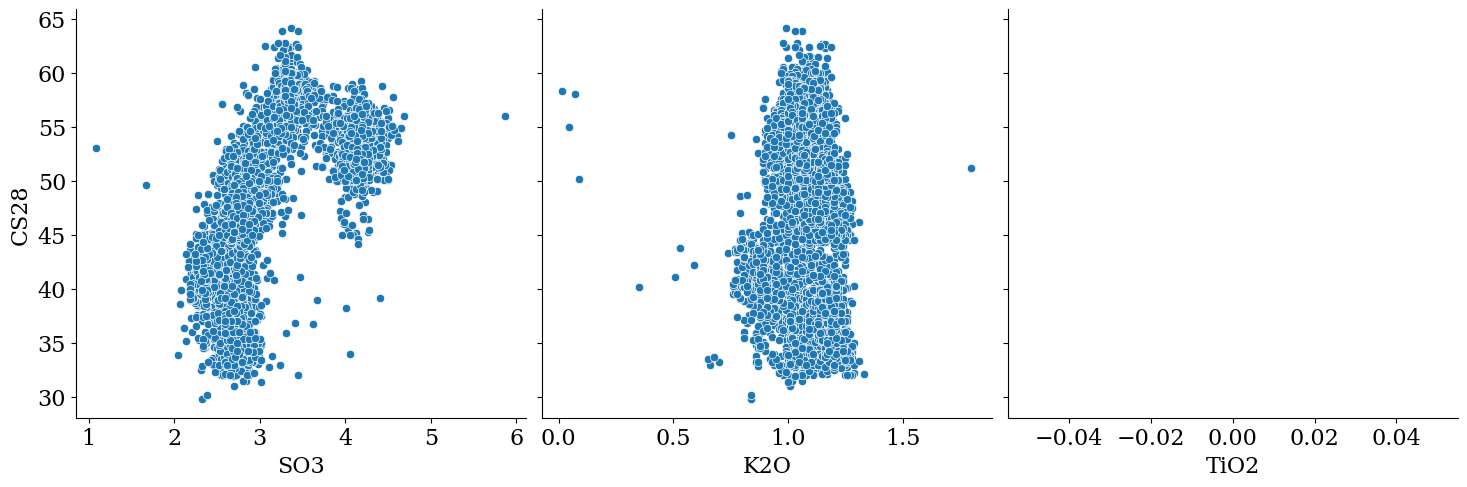

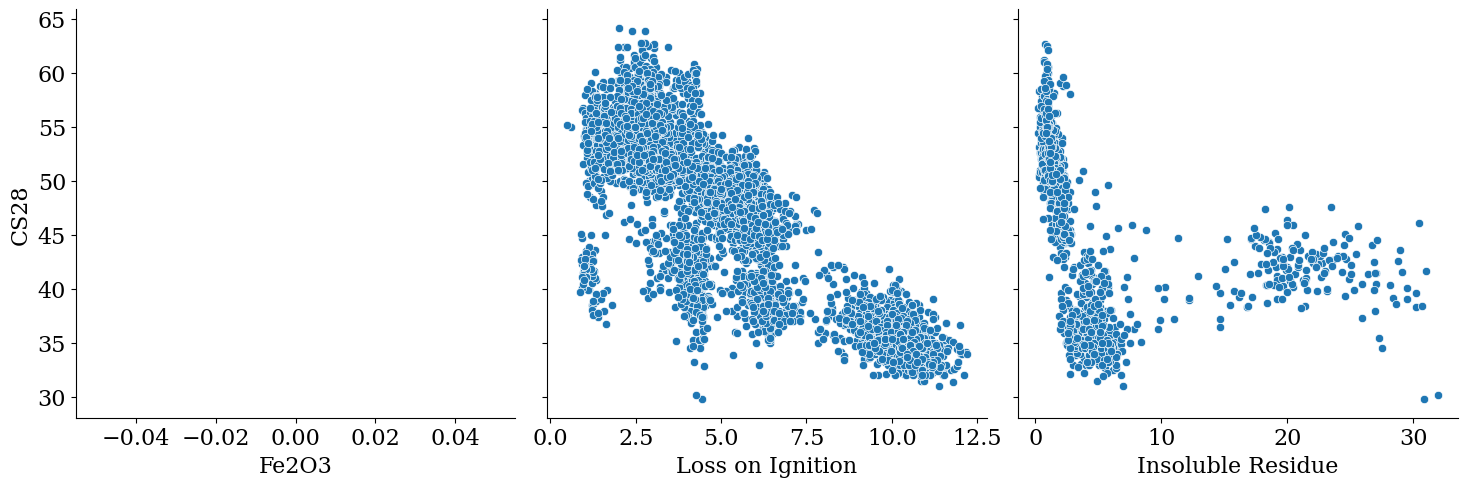

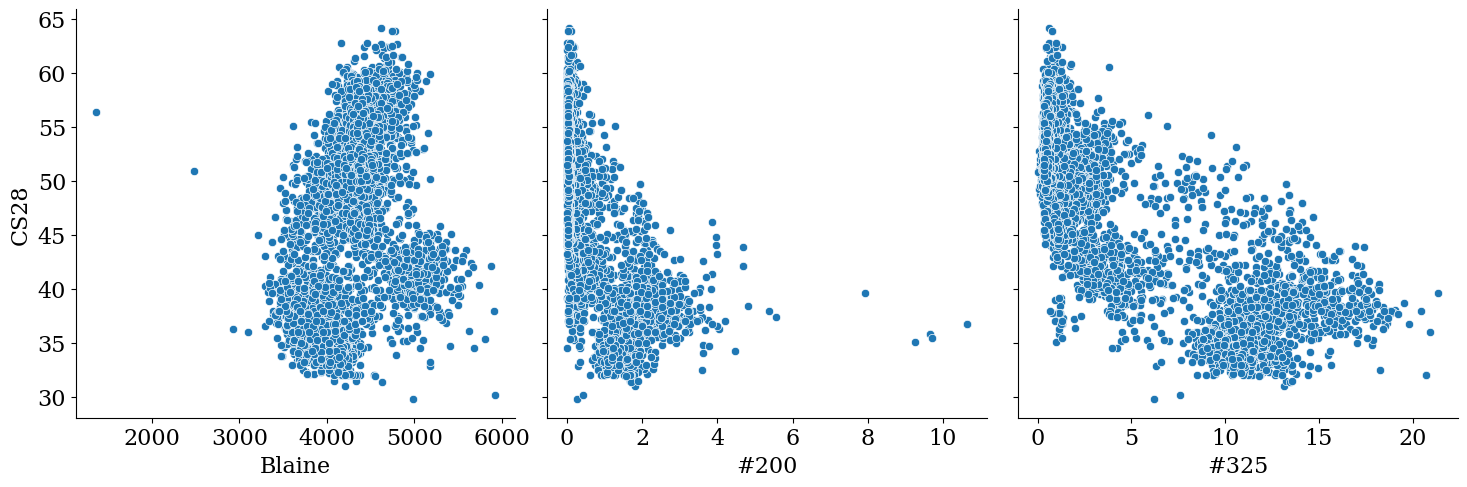

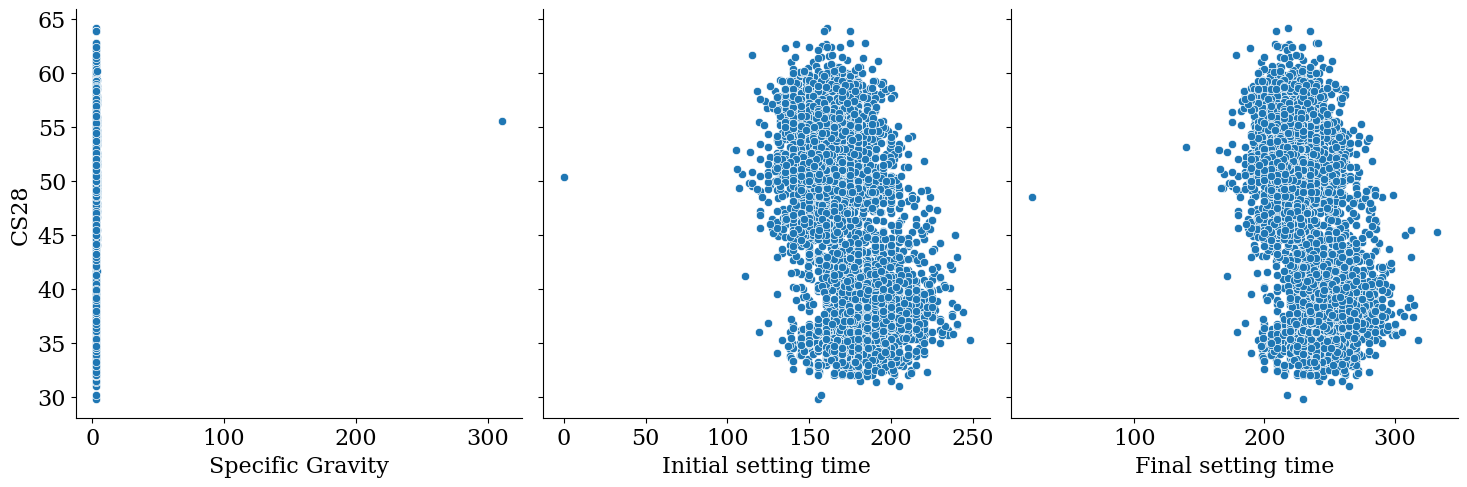

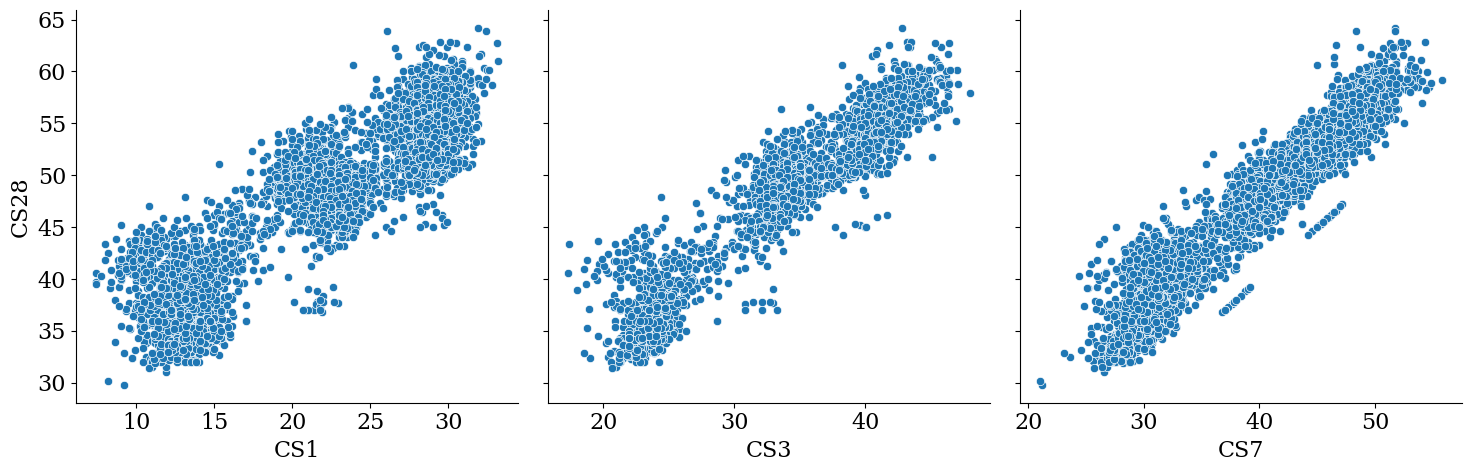

<IPython.core.display.Javascript object>

In [57]:
num_lines = 7
plots_per_line = 3

variables_to_plot = df.select_dtypes(exclude=object).columns.tolist()
variables_to_plot.remove("CS28")

warnings.filterwarnings("ignore")

for n in range(num_lines):
    start_idx = n * plots_per_line
    end_idx = start_idx + plots_per_line

    grid = sns.pairplot(
        df,
        x_vars=variables_to_plot[start_idx:end_idx],
        y_vars=["CS28"],
        diag_kind="kde",
        kind="scatter",
        height=5,
    )

# grid.fig.suptitle(
#     "Bivariate Analysis: Variables vs. 28-day Compressive Strength", y=1.02
# )
plt.tight_layout()
plt.show()

In [58]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

<IPython.core.display.Javascript object>

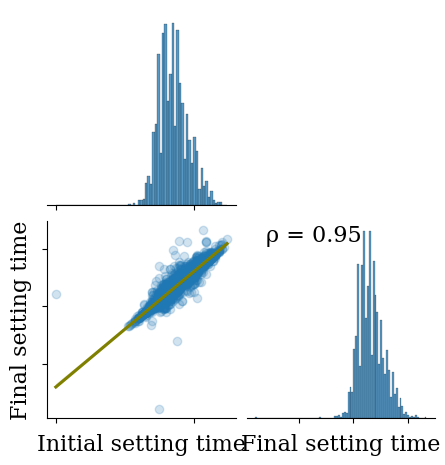

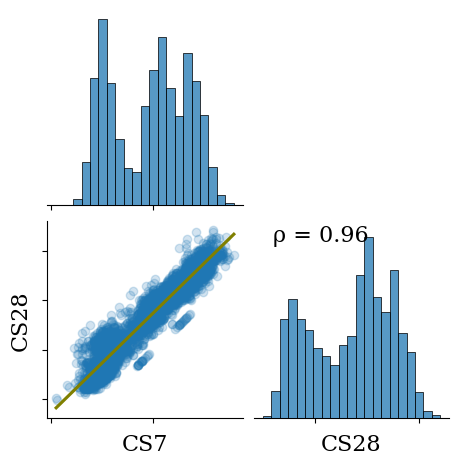

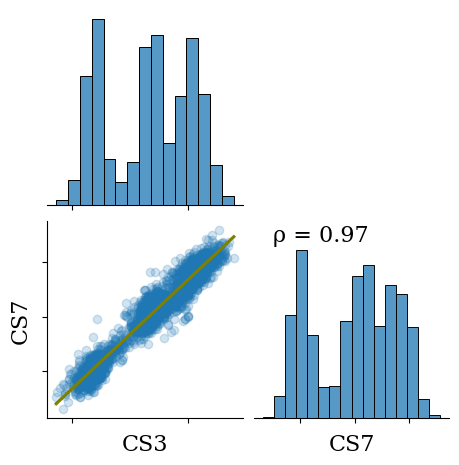

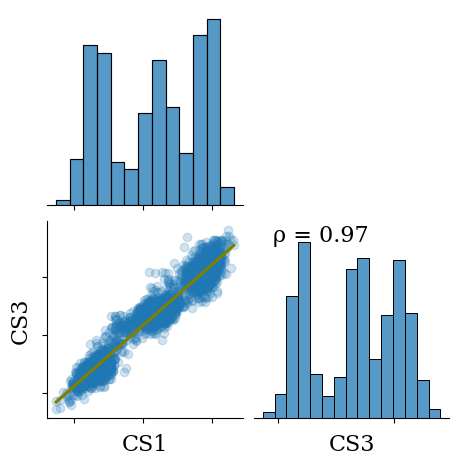

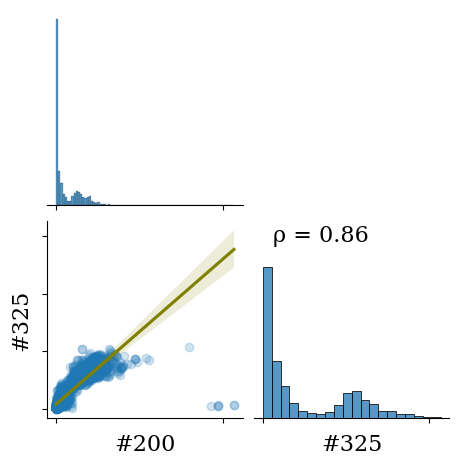

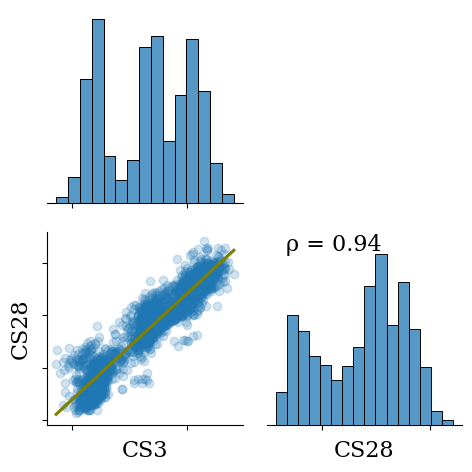

<IPython.core.display.Javascript object>

In [59]:
warnings.filterwarnings("ignore")

for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

### 4. Date/TimeVariable Analyses

In [60]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

1602 valid days out of 1655


<IPython.core.display.Javascript object>

In [61]:
# What are the years the data was collected?
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2011, 2015}


<IPython.core.display.Javascript object>

In [62]:
# What are months the data was collected for every year?

months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2016: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2017: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2018: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2019: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2020: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2022: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2023: {1, 2, 3, 4},
 2011: {1},
 2015: {8, 9, 10, 11, 12}}

<IPython.core.display.Javascript object>

In [63]:
# How many unique days every month has for every year?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"])["Day"].apply(
    lambda x: len(x.unique())
)

# Give a name to the series
df_year_month.name = "Unique days per month"

# Print the dataframe
print(df_year_month)

Year  Month
2011  1         1
2015  8        16
      9        23
      10       27
      11       26
               ..
2022  12       17
2023  1        18
      2        16
      3        18
      4        14
Name: Unique days per month, Length: 94, dtype: int64


<IPython.core.display.Javascript object>

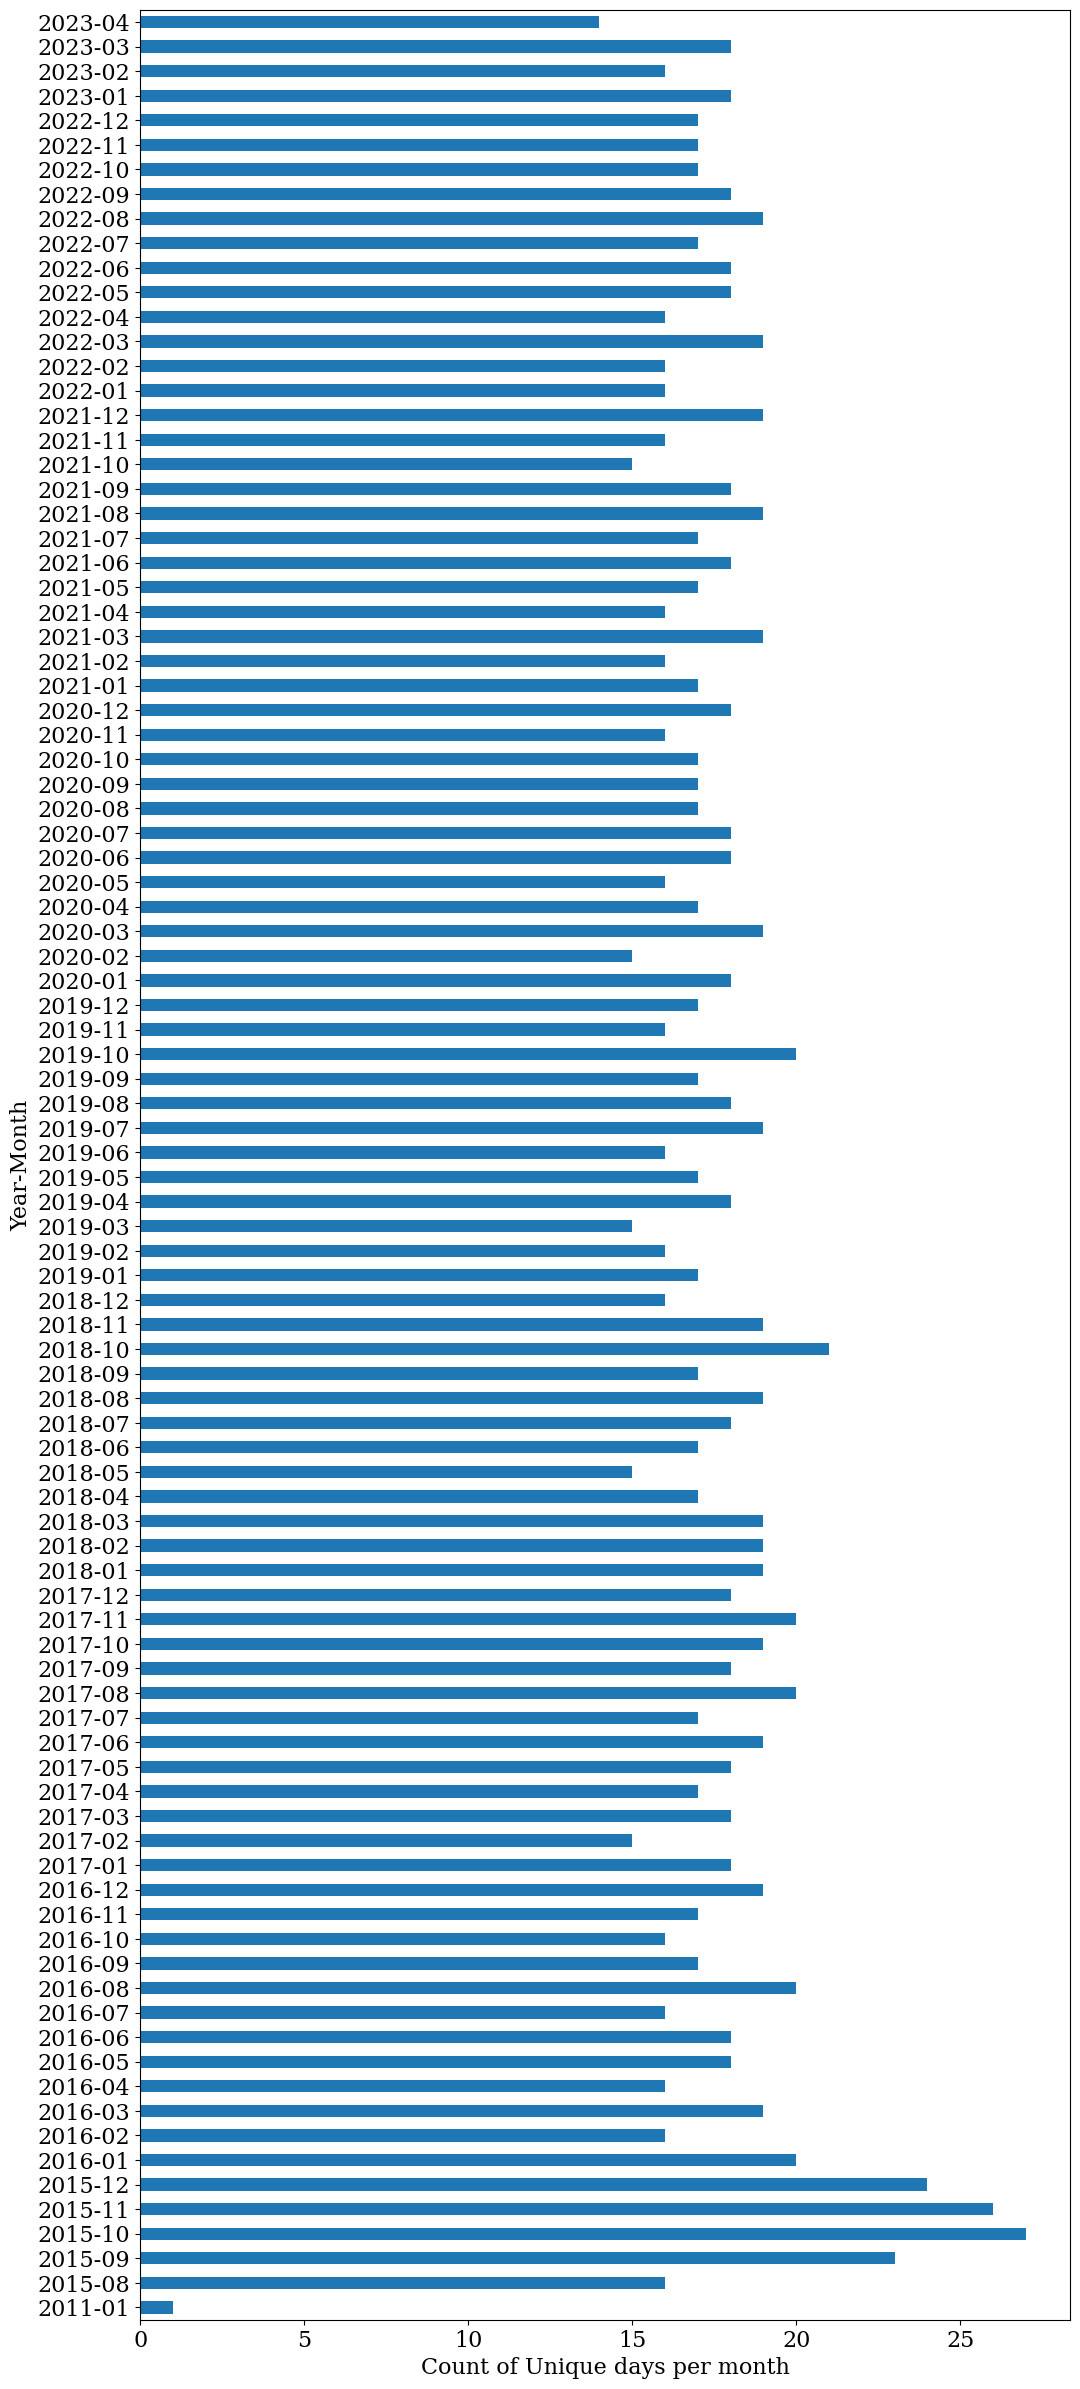

<IPython.core.display.Javascript object>

In [64]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(12, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of Unique days per month")
None

In [65]:
# How many data points every month has for every year?

year = dates.dt.year
month = dates.dt.month

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"]).size()

# Give a name to the series
df_year_month.name = "size"

# Print the dataframe
print(df_year_month)

Year  Month
2011  1         1
2015  8        23
      9        58
      10       73
      11       71
               ..
2022  12       51
2023  1        71
      2        47
      3        54
      4        42
Name: size, Length: 94, dtype: int64


<IPython.core.display.Javascript object>

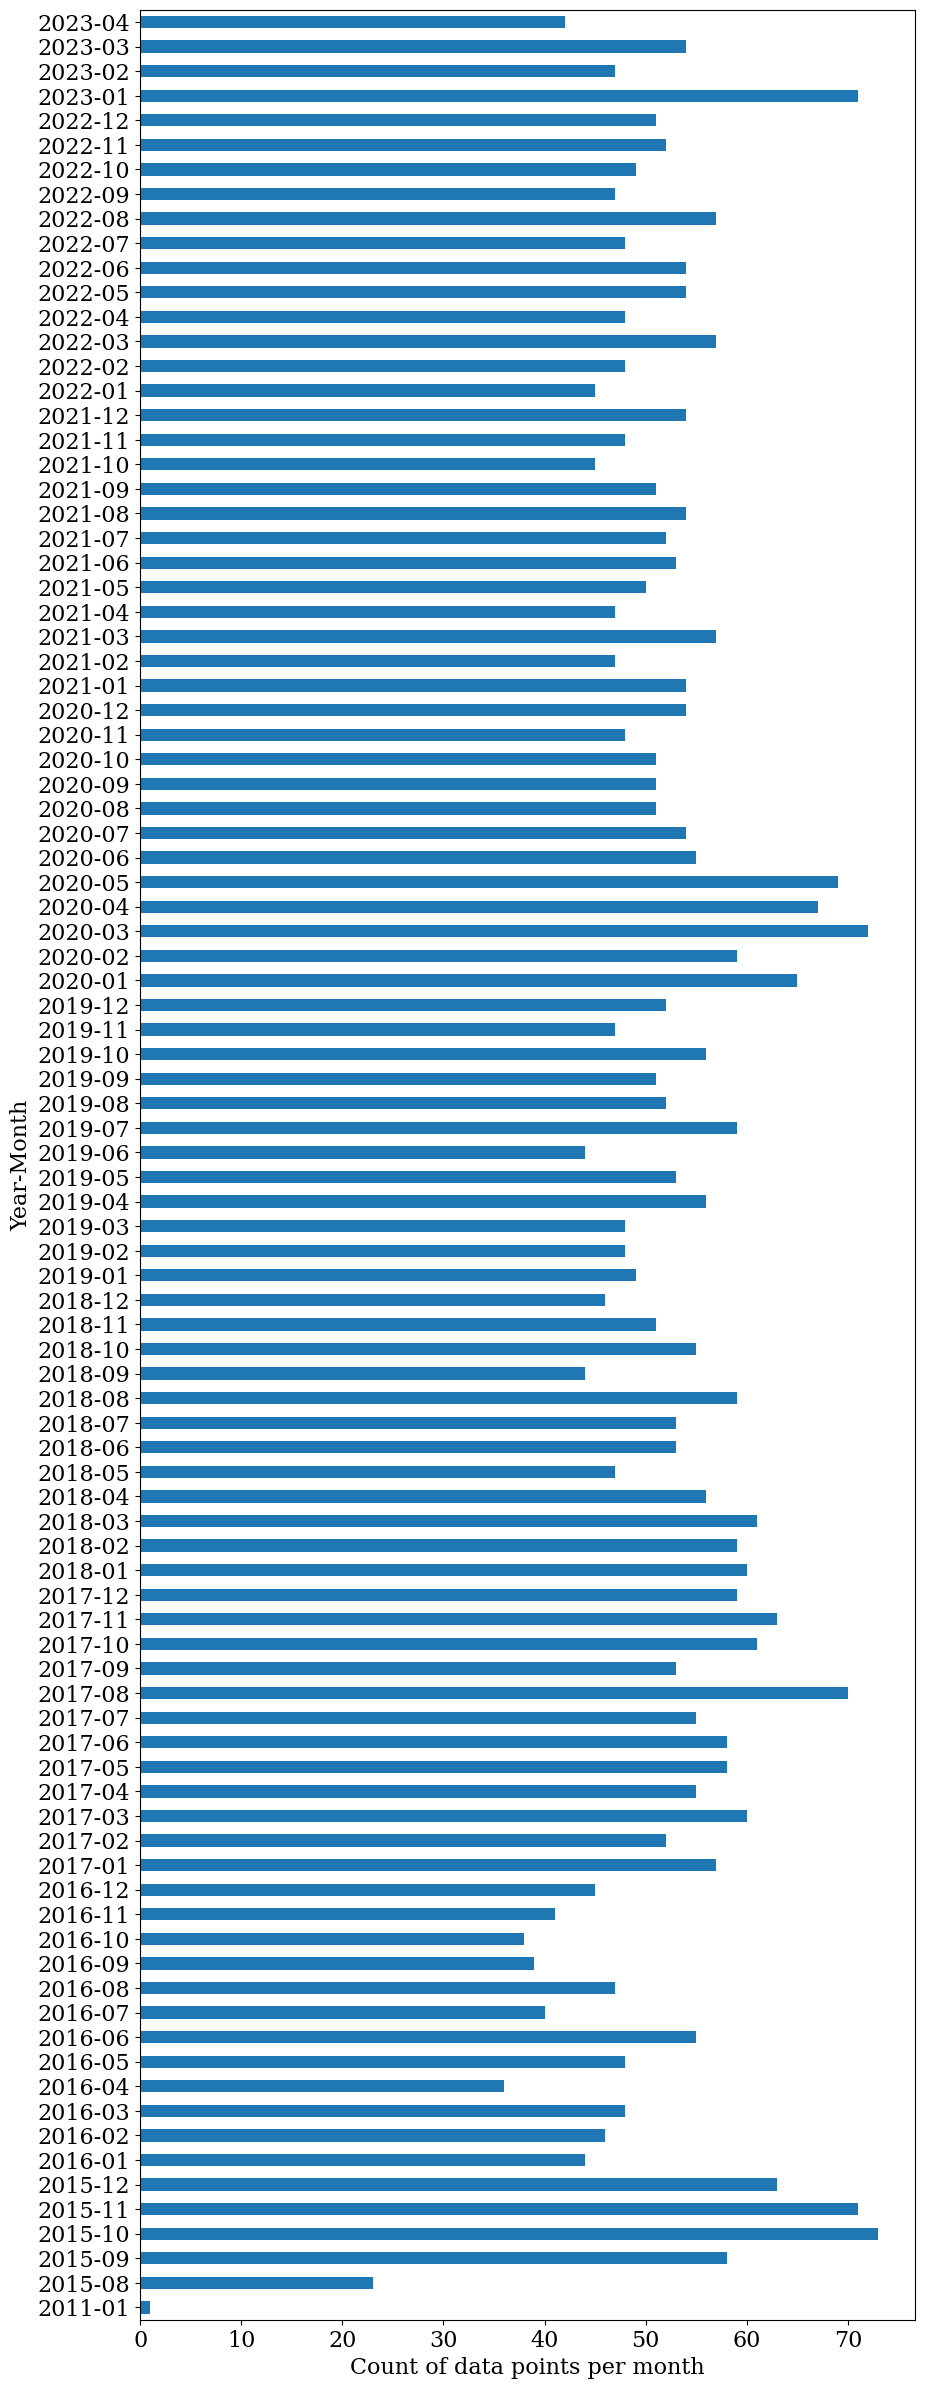

<IPython.core.display.Javascript object>

In [66]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of data points per month")
None

In [67]:
# What is the year-month with the minimum and maximum number of collected data points?

df_reseted = df_year_month.reset_index()
df_reseted["Year_Month"] = (
    df_reseted["Year"].apply(str) + "-" + df_reseted["Month"].apply(str)
)

min_obs_key, min_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].min()][
    ["Year_Month", "size"]
].values[0]

max_obs_key, max_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].max()][
    ["Year_Month", "size"]
].values[0]


print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2011-1 has the minimum number of days with samples - 1
2015-10 has the maximum number of days with samples - 73


<IPython.core.display.Javascript object>

In [68]:
# What is the mean number of observations per year?

mean_obs_per_year = df_year_month.groupby(["Year"]).mean(["size"]).apply(int).to_dict()

print("Mean Number of observations - per year")
print(mean_obs_per_year)
print()
print("Mean number of observations - all years")
print(int(df_year_month.mean()))

Mean Number of observations - per year
{2011: 1, 2015: 57, 2016: 43, 2017: 58, 2018: 53, 2019: 51, 2020: 58, 2021: 51, 2022: 50, 2023: 53}

Mean number of observations - all years
52


<IPython.core.display.Javascript object>

In [69]:
# How many times every day reapeats for each year-month?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day
# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})


# Group by year, month, and day, and count occurrences
day_counts = (
    df_year_month.groupby(["Year", "Month", "Day"]).size().reset_index(name="DayCount")
)

day_counts[["DayCount"]].describe()

DayCount
count  1655.000000
mean      2.965559
std       0.738899
min       1.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       6.000000

<IPython.core.display.Javascript object>

In [70]:
day_counts[["DayCount"]].value_counts()

DayCount
3           1072
4            282
2            197
1             88
5             14
6              2
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [71]:
day_counts[day_counts["DayCount"] == day_counts["DayCount"].max()]

Year  Month  Day  DayCount
104  2015     12   15         6
514  2017     11    9         6

<IPython.core.display.Javascript object>

### Compressive Strength Distribution

#### 1 Day

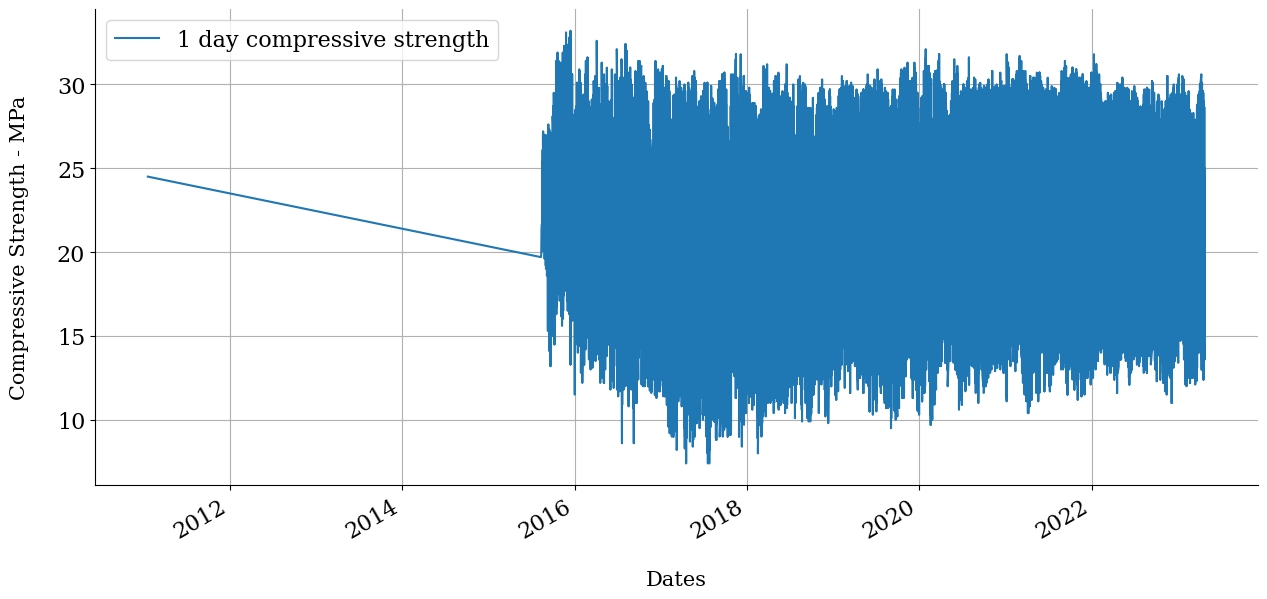

<IPython.core.display.Javascript object>

In [72]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

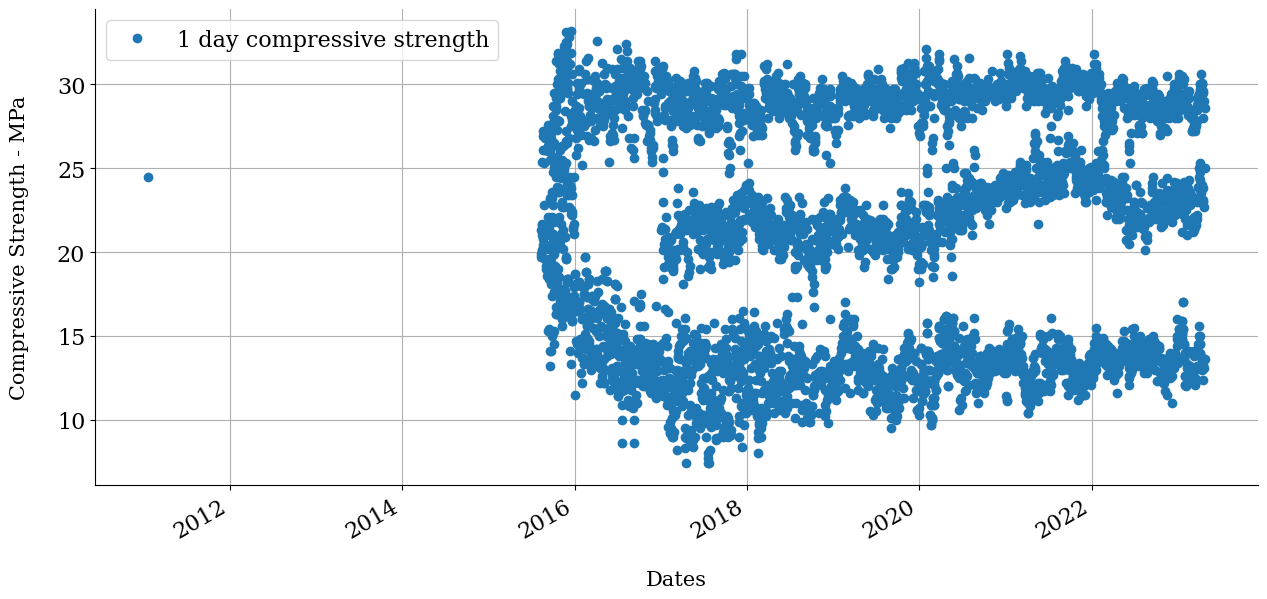

<IPython.core.display.Javascript object>

In [73]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax, marker="o", linestyle="")
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

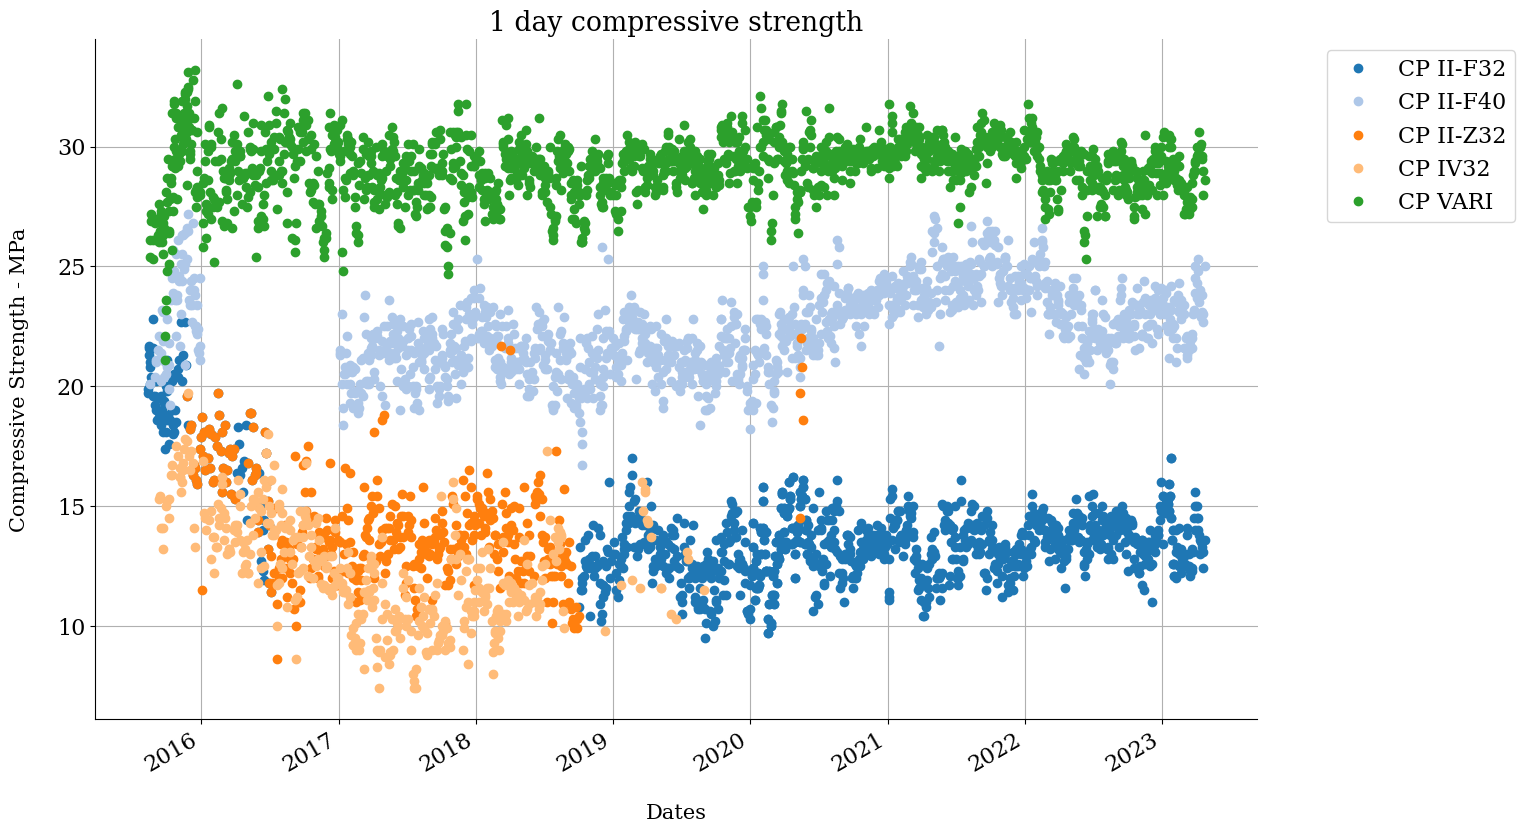

<IPython.core.display.Javascript object>

In [74]:
tmp = df[["Date", "CS1", "Cement_Type"]].dropna().copy()
tmp = tmp[(tmp["Date"].dt.year != 1900) & (tmp["Date"].dt.year > 2012)].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("1 day compressive strength")

plt.show()


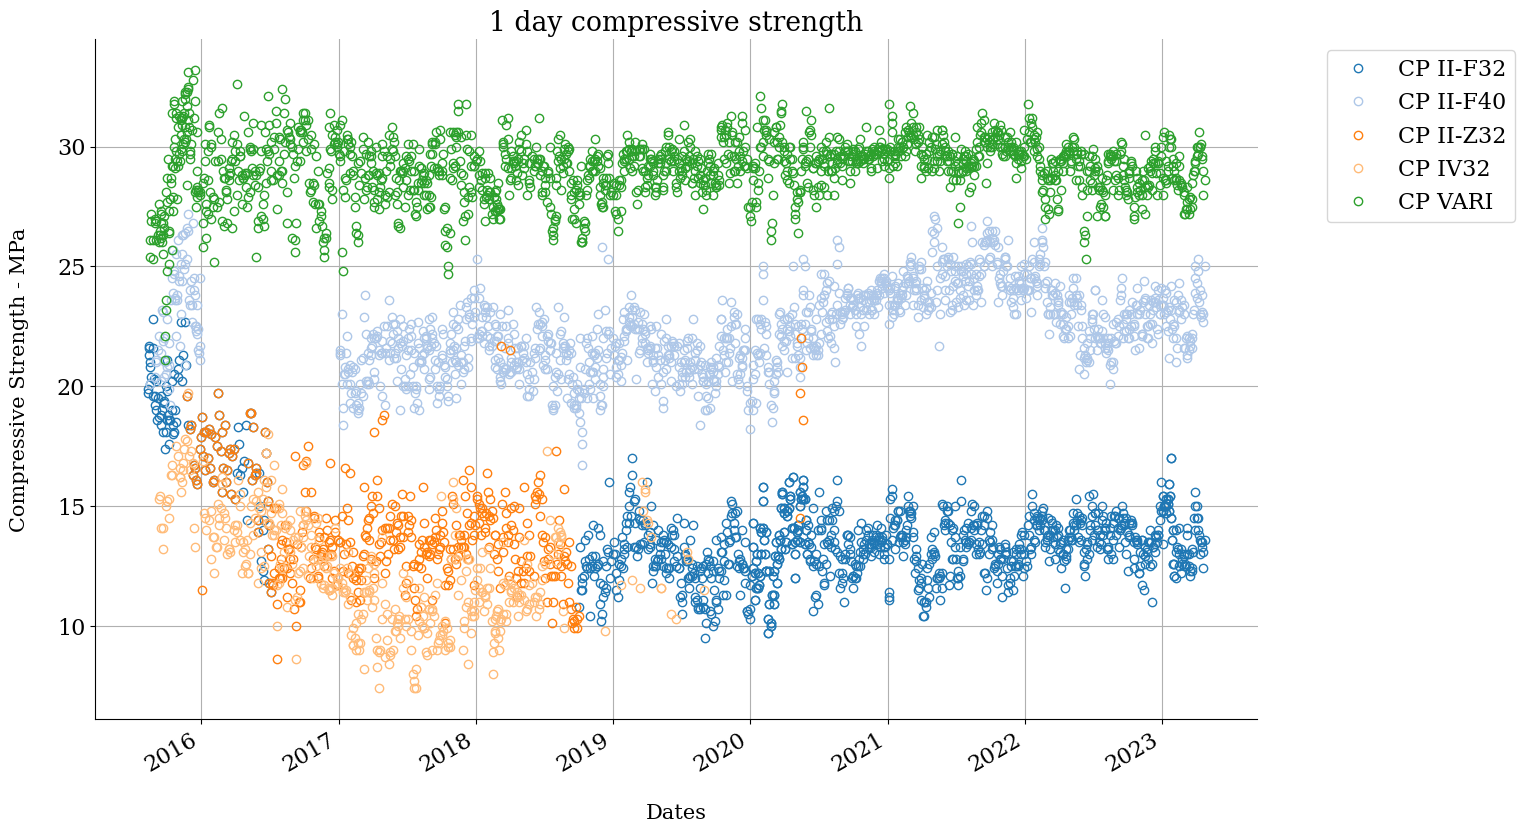

<IPython.core.display.Javascript object>

In [75]:
tmp = df[["Date", "CS1", "Cement_Type"]].dropna().copy()
tmp = tmp[(tmp["Date"].dt.year != 1900) & (tmp["Date"].dt.year > 2012)].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type, markerfacecolor="None")

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("1 day compressive strength")

plt.show()


#### 3 Days

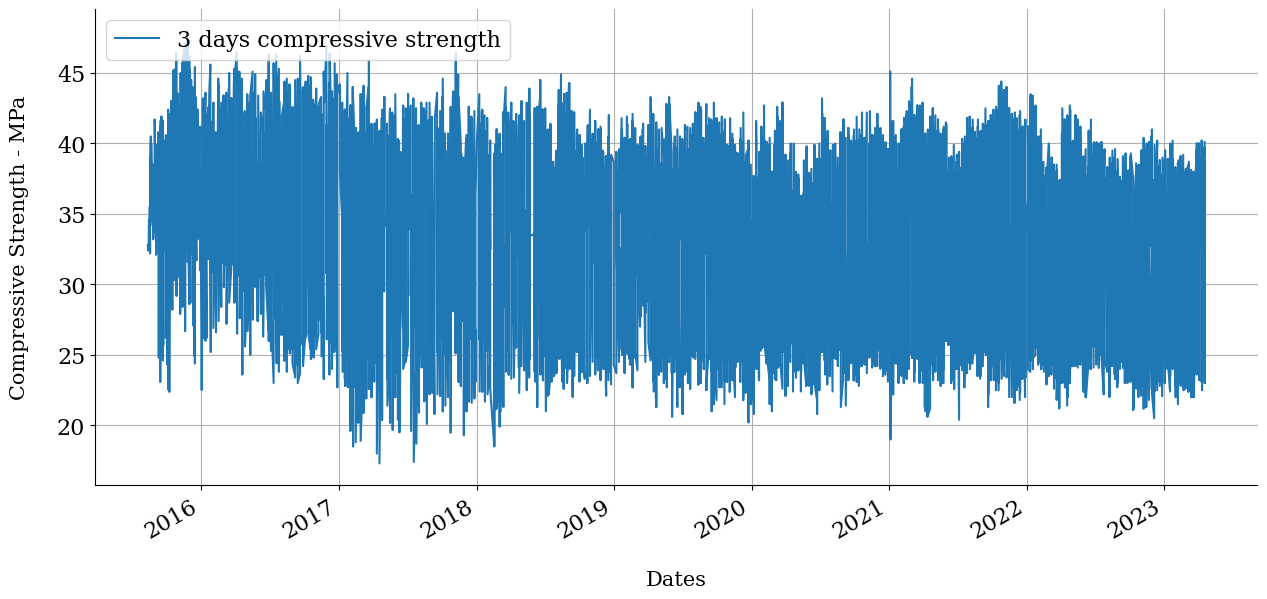

<IPython.core.display.Javascript object>

In [76]:
tmp = df[["Date", "CS3"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["3 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

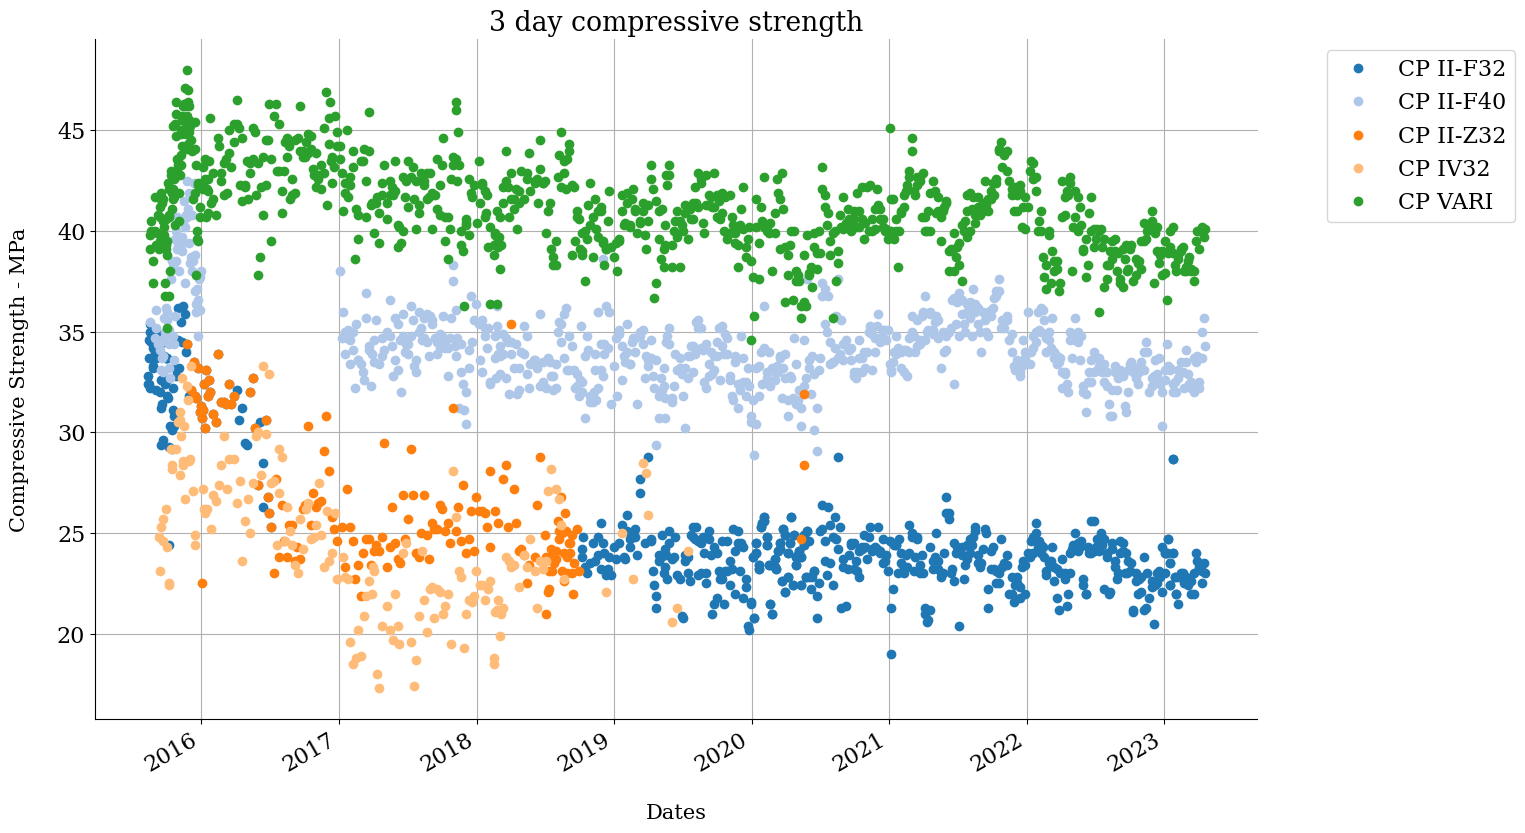

<IPython.core.display.Javascript object>

In [77]:
tmp = df[["Date", "CS3", "Cement_Type"]].dropna().copy()
tmp = tmp[(tmp["Date"].dt.year != 1900) & (tmp["Date"].dt.year > 2012)].reset_index(
    drop=True
)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("3 day compressive strength")

plt.show()

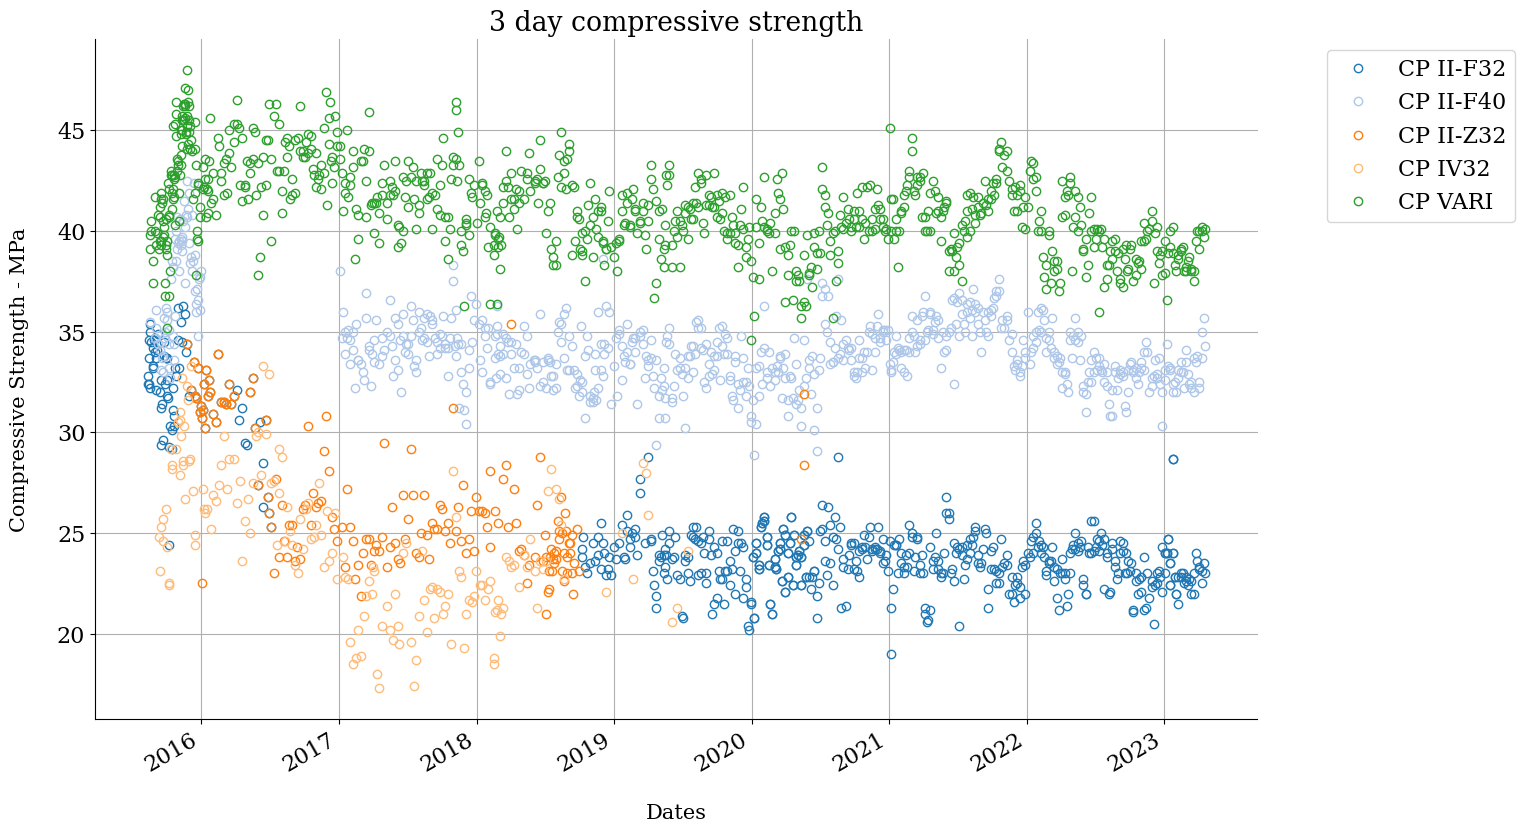

<IPython.core.display.Javascript object>

In [78]:
tmp = df[["Date", "CS3", "Cement_Type"]].dropna().copy()
tmp = tmp[(tmp["Date"].dt.year != 1900) & (tmp["Date"].dt.year > 2012)].reset_index(
    drop=True
)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(
        ax=ax,
        marker="o",
        linestyle="",
        color=colors[i],
        label=cement_type,
        markerfacecolor="None",
    )

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("3 day compressive strength")

plt.show()

#### 7 Days

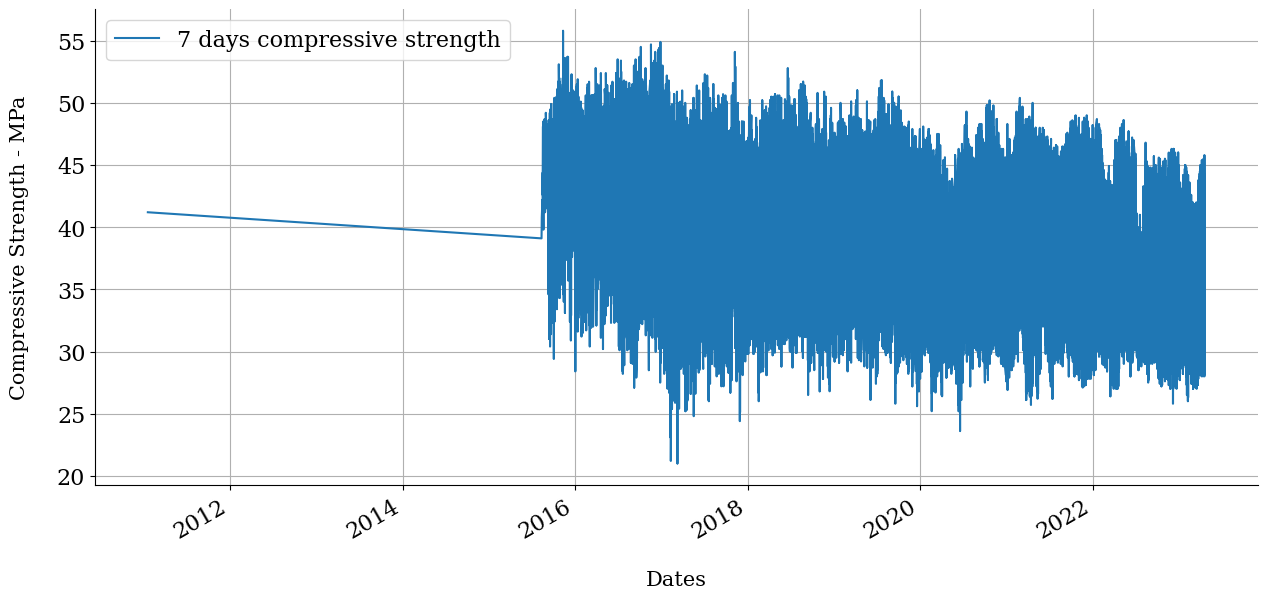

<IPython.core.display.Javascript object>

In [79]:
tmp = df[["Date", "CS7"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

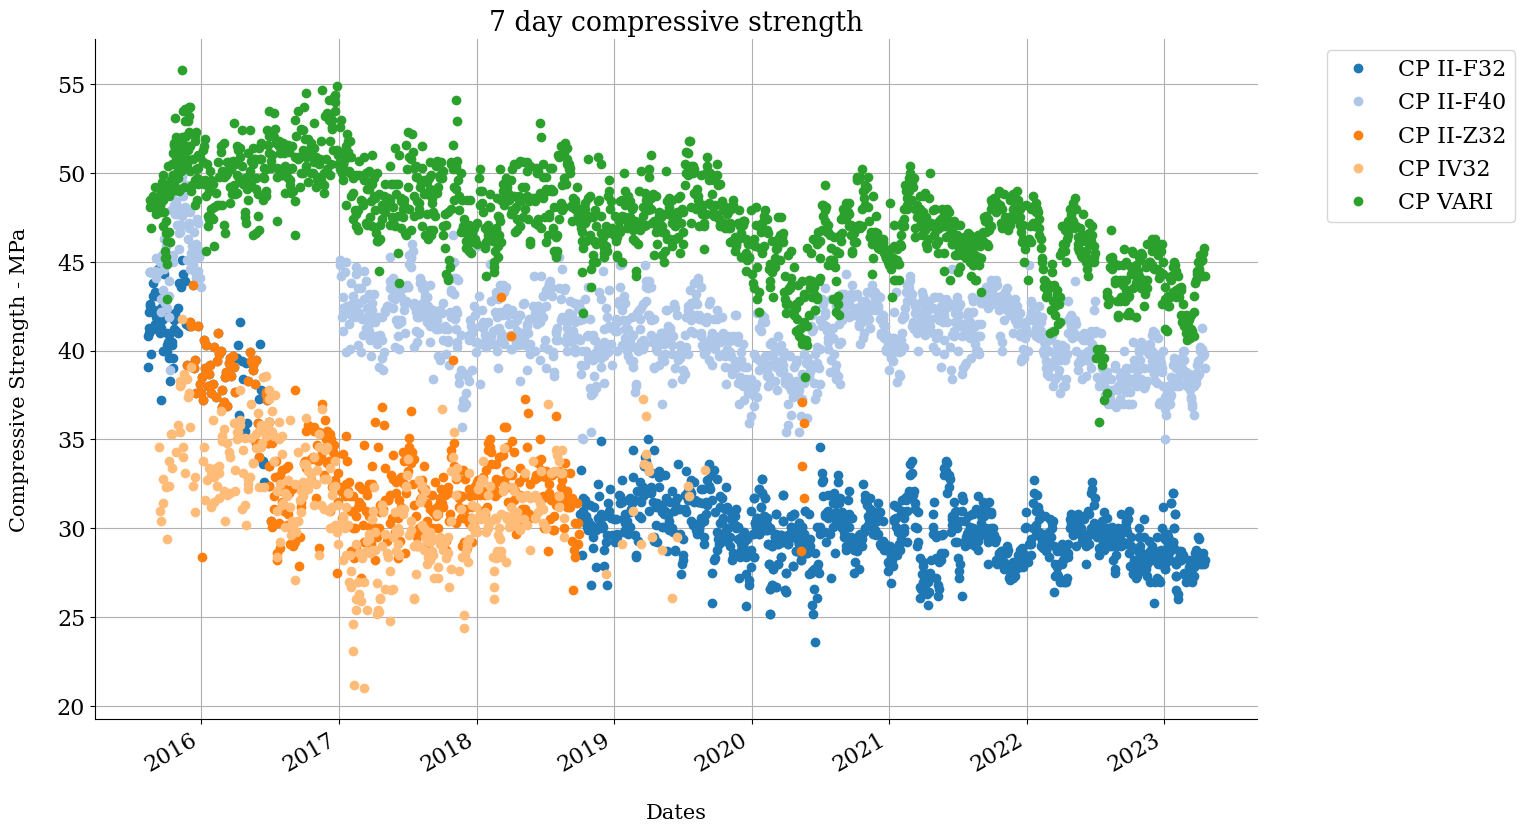

<IPython.core.display.Javascript object>

In [80]:
tmp = df[["Date", "CS7", "Cement_Type"]].dropna().copy()
tmp = tmp[(tmp["Date"].dt.year != 1900) & (tmp["Date"].dt.year > 2012)].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("7 day compressive strength")

plt.show()


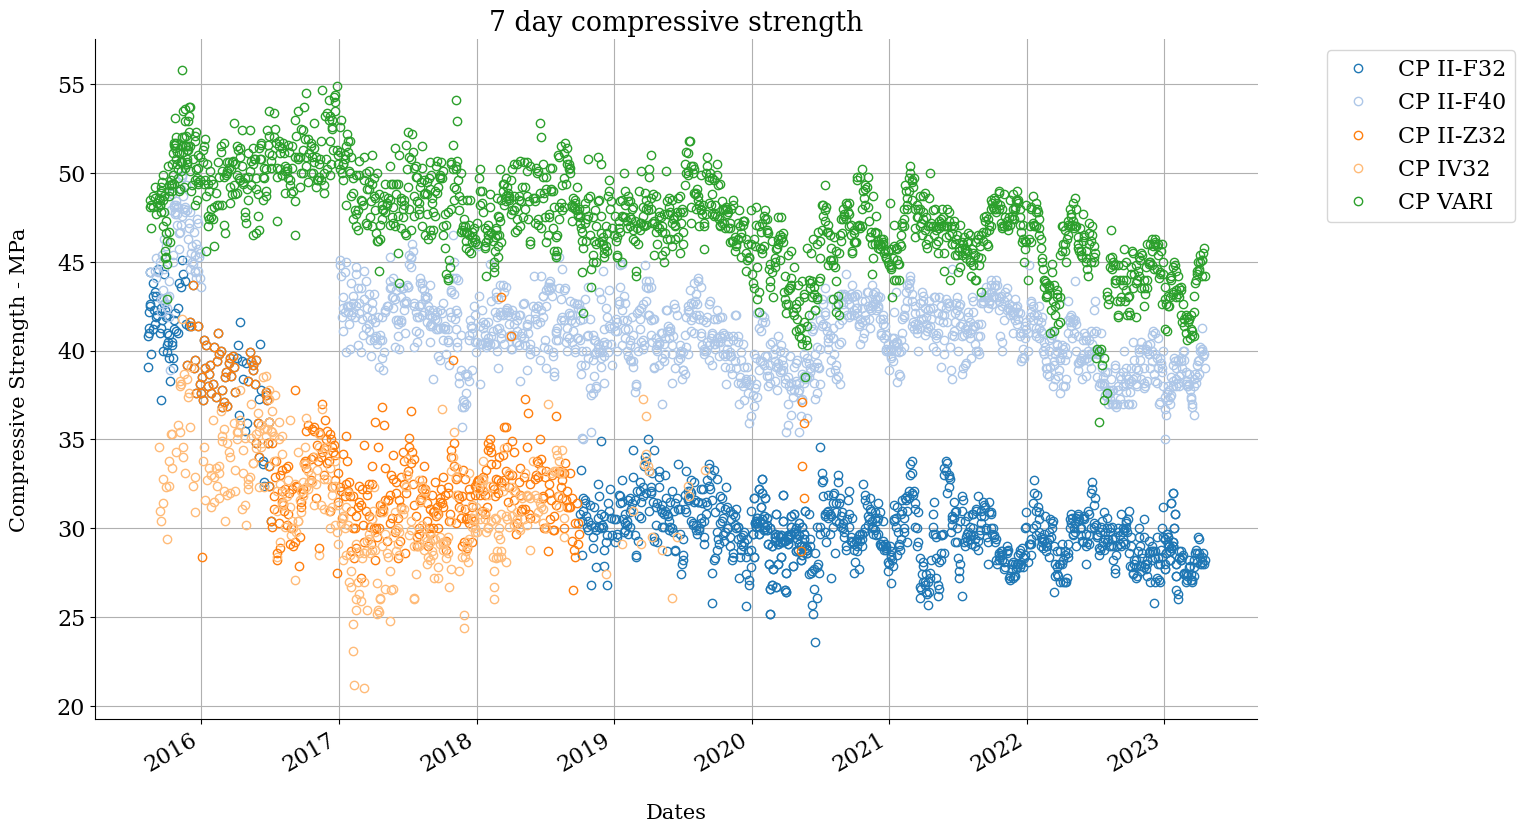

<IPython.core.display.Javascript object>

In [81]:
tmp = df[["Date", "CS7", "Cement_Type"]].dropna().copy()
tmp = tmp[(tmp["Date"].dt.year != 1900) & (tmp["Date"].dt.year > 2012)].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type, markerfacecolor="None",)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("7 day compressive strength")

plt.show()


#### 28 Days

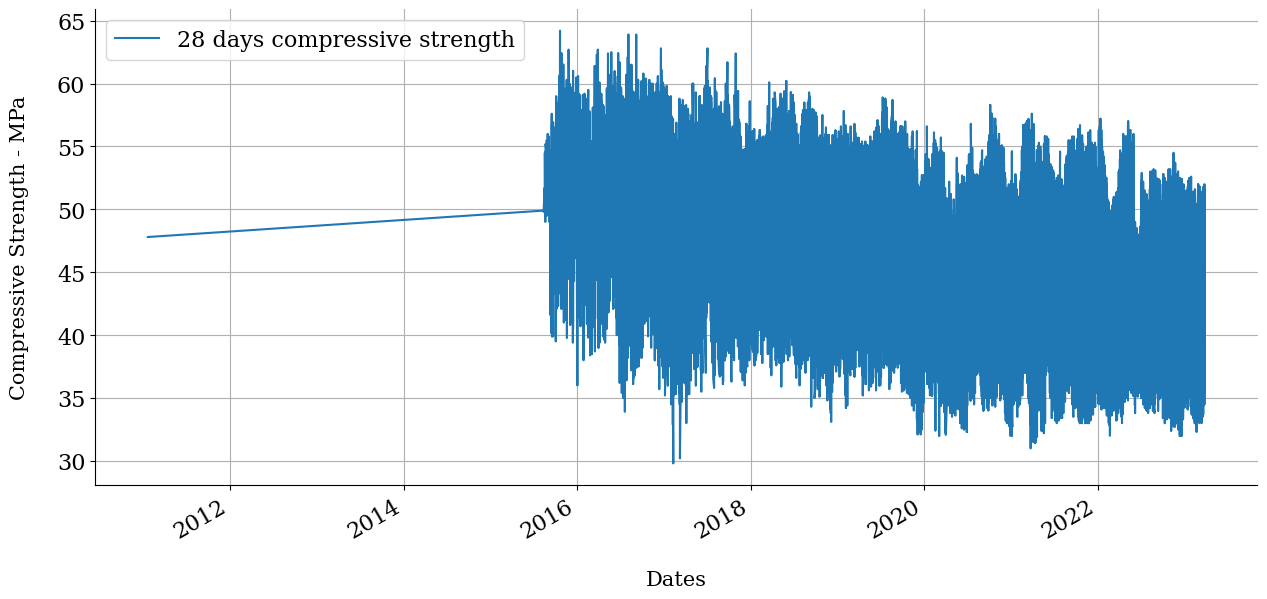

<IPython.core.display.Javascript object>

In [82]:
tmp = df[["Date", "CS28"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

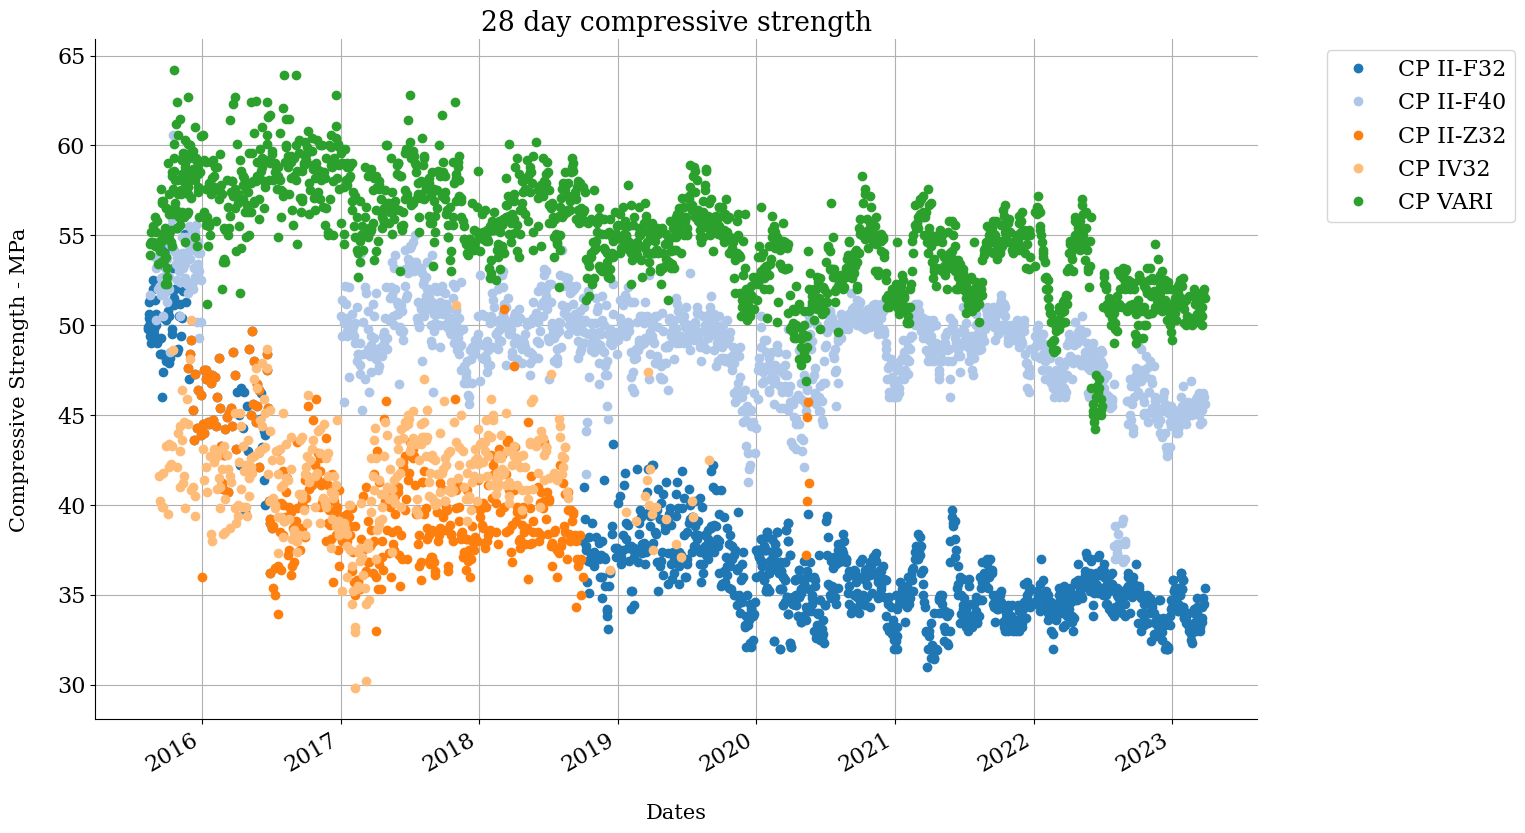

<IPython.core.display.Javascript object>

In [83]:
tmp = df[["Date", "CS28", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["CS28"] != 0].reset_index(drop=True)
tmp = tmp[(tmp["Date"].dt.year != 1900) & (tmp["Date"].dt.year > 2012)].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("28 day compressive strength")

plt.show()


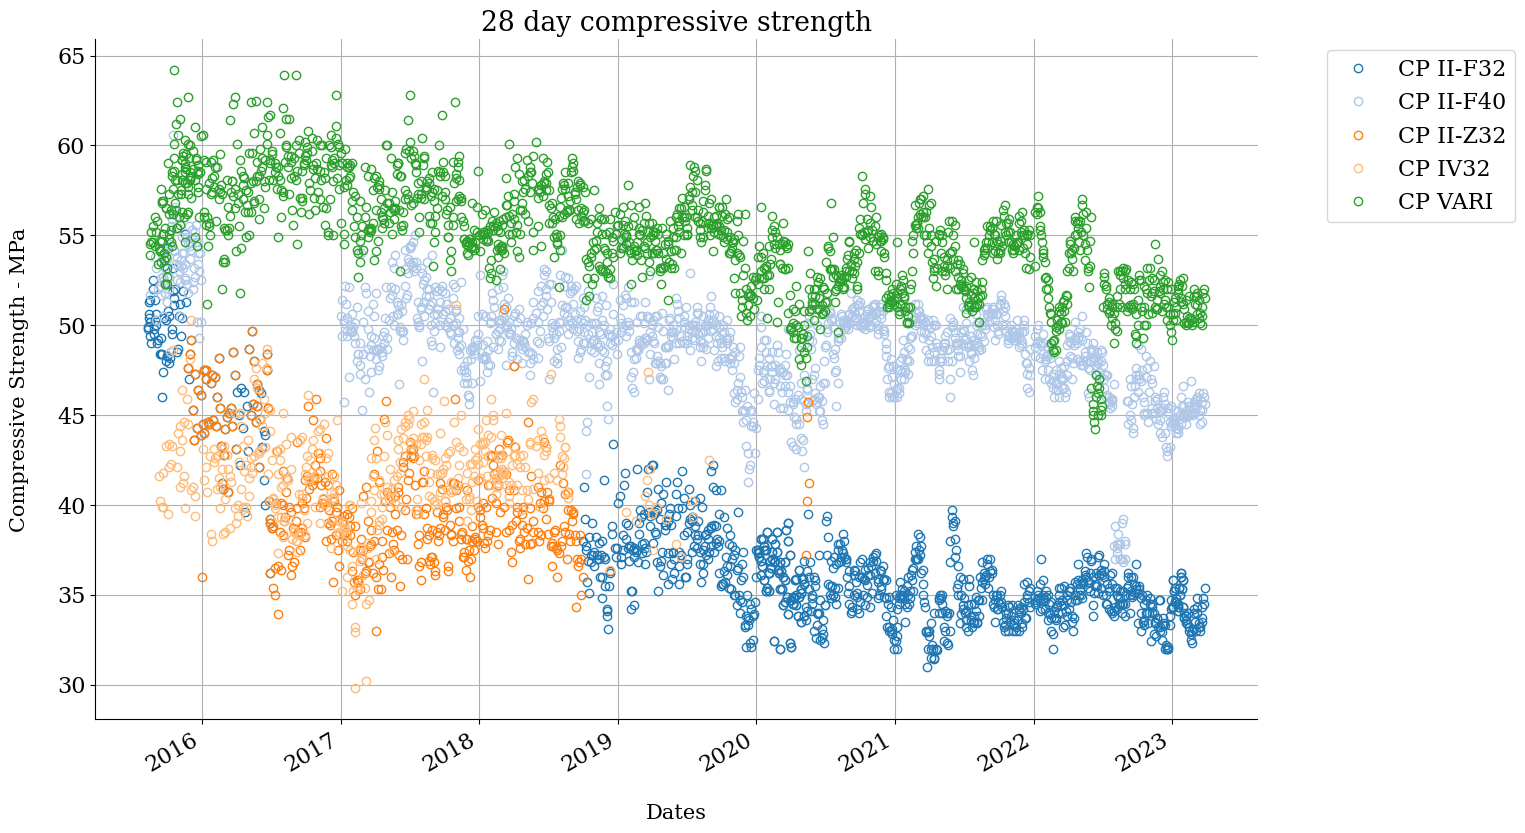

<IPython.core.display.Javascript object>

In [84]:
tmp = df[["Date", "CS28", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["CS28"] != 0].reset_index(drop=True)
tmp = tmp[(tmp["Date"].dt.year != 1900) & (tmp["Date"].dt.year > 2012)].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type, markerfacecolor="None")

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("28 day compressive strength")

plt.show()
